# About Dataset

Features:
fraud_bool (boolean) = (1 if fraud, 0 if legit).

income (numeric) = Annual income of the applicant in quantiles. Ranges between [0, 1].

name_email_similarity (numeric) = Metric of similarity between email and applicant’s name. Higher values represent higher similarity. Ranges

prev_address_months_count (numeric) = Number of months in previous registered address of the applicant, i.e. the applicant’s previous residence, if applicable. Ranges between [-1, 380] months (-1 is a missing value).

current_address_months_count (numeric) = Months in currently registered address of the applicant. Ranges between [-1, 429] months (-1 is a missing value).

customer_age (numeric) = Applicant’s age in bins per decade (e.g, 20-29 is represented as 20). Ranges between [10, 90] years.

days_since_request (numeric): Number of days passed since application was done. Ranges between [0, 79] days.

intended_balcon_amount (numeric): Initial transferred amount for application. Ranges between [–16, 114] (negatives are missing values).

payment_type (categorical): Credit payment plan type. 5 possible (anonymized) values.

zip_count_4w (numeric): Number of applications within same zip code in last 4 weeks. Ranges between [1, 6830].

velocity_6h (numeric): Velocity of total applications made in last 6 hours i.e., average number of applications per hour in the last 6 hours. Ranges between [–175, 16818].

velocity_24h (numeric): Velocity of total applications made in last 24 hours i.e., average number of applications per hour in the last 24 hours. Ranges between [1297, 9586].

velocity_4w (numeric): Velocity of total applications made in last 4 weeks i.e., average number of applications per hour in the last 4 weeks. Ranges between [2825, 7020].

bank_branch_count_8w (numeric): Number of total applications in the selected bank branch in last 8 weeks. Ranges between [0, 2404].

date_of_birth_distinct_emails_4w (numeric): Number of emails for applicants with same date of birth in last 4 weeks. Ranges between [0, 39].

employment_status (categorical): Employment status of the applicant. 7 possible (anonymized) values.

credit_risk_score (numeric): Internal score of application risk. Ranges between [–191, 389].

email_is_free (binary): Domain of application email (either free or paid).

housing_status (categorical): Current residential status for applicant. 7 possible (anonymized) values.

phone_home_valid (binary): Validity of provided home phone.

phone_mobile_valid (binary): Validity of provided mobile phone.

bank_months_count (numeric): How old is previous account (if held) in months. Ranges between [–1, 32] months (–1 is a missing value).

has_other_cards (binary): If applicant has other cards from the same banking company.

proposed_credit_limit (numeric): Applicant’s proposed credit limit. Ranges between [200, 2000].

foreign_request (binary): If origin country of request is different from bank’s country.

source (categorical): Online source of application. Either browser (INTERNET) or app (TELEAPP).

session_length_in_minutes (numeric): Length of user session in banking website in minutes. Ranges between [–1, 107] minutes (–1 is a missing value).

device_os (categorical): Operative system of device that made request. Possible values are: Windows, macOS, Linux, X11, or other.

keep_alive_session (binary): User option on session logout.

device_distinct_emails (numeric): Number of distinct emails in banking website from the used device in last 8 weeks. Ranges between [–1, 2] emails (–1 is a missing value).

device_fraud_count (numeric): Number of fraudulent applications with used device. Ranges between [0, 1].

month (numeric): Month where the application was made. Ranges between [0, 7].

Link dataset: https://www.kaggle.com/datasets/sgpjesus/bank-account-fraud-dataset-neurips-2022

In [1]:
!pip uninstall scikit-learn imbalanced-learn -y
!pip install scikit-learn==1.3.2 imbalanced-learn==0.11.0

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
Found existing installation: imbalanced-learn 0.13.0
Uninstalling imbalanced-learn-0.13.0:
  Successfully uninstalled imbalanced-learn-0.13.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 13.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.


# Load Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.feature_selection import VarianceThreshold, RFE, SelectKBest, f_classif
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
sns.set()

In [3]:
df = pd.read_csv("/kaggle/input/bank-account-fraud-dataset-neurips-2022/Base.csv", nrows=200_000)
df

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0,0.5,0.528804,26,13,20,0.018300,51.504923,AA,2074,...,0,200.0,0,INTERNET,3.871854,other,1,1,0,1
199996,0,0.4,0.079761,137,14,30,4.018075,-0.830555,AC,1577,...,0,200.0,0,INTERNET,5.545133,other,1,1,0,1
199997,0,0.4,0.161715,-1,58,20,0.013512,-1.329180,AB,2810,...,0,200.0,0,INTERNET,4.119012,other,1,1,0,1
199998,0,0.6,0.136501,25,4,20,0.003101,-1.465252,AB,3215,...,0,200.0,0,INTERNET,3.060711,linux,0,1,0,1


# Data Understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 32 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   fraud_bool                        200000 non-null  int64  
 1   income                            200000 non-null  float64
 2   name_email_similarity             200000 non-null  float64
 3   prev_address_months_count         200000 non-null  int64  
 4   current_address_months_count      200000 non-null  int64  
 5   customer_age                      200000 non-null  int64  
 6   days_since_request                200000 non-null  float64
 7   intended_balcon_amount            200000 non-null  float64
 8   payment_type                      200000 non-null  object 
 9   zip_count_4w                      200000 non-null  int64  
 10  velocity_6h                       200000 non-null  float64
 11  velocity_24h                      200000 non-null  f

In [5]:
df.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.0,200000.000000
mean,0.010630,0.537184,0.496496,16.557660,90.367210,33.392550,9.422854e-01,9.647162,2003.240790,7225.366960,...,0.884425,11.686195,0.183595,567.759700,0.033180,8.189715,0.648550,1.028535,0.0,0.337800
std,0.102553,0.290785,0.286043,44.278904,91.934497,12.327525,4.707124e+00,20.696069,1263.268756,3116.262052,...,0.319715,11.922711,0.387155,544.830232,0.179107,8.679465,0.477424,0.215873,0.0,0.472961
min,0.000000,0.100000,0.000032,-1.000000,-1.000000,10.000000,4.036860e-09,-13.202786,2.000000,-29.235883,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
25%,0.000000,0.200000,0.225106,-1.000000,22.000000,20.000000,7.039064e-03,-1.184425,1073.000000,4981.488358,...,1.000000,1.000000,0.000000,200.000000,0.000000,3.469201,0.000000,1.000000,0.0,0.000000
50%,0.000000,0.600000,0.513060,-1.000000,53.000000,30.000000,1.489647e-02,-0.809822,1584.000000,7380.364739,...,1.000000,9.000000,0.000000,200.000000,0.000000,5.341666,1.000000,1.000000,0.0,0.000000
75%,0.000000,0.800000,0.745551,11.000000,142.000000,40.000000,2.593825e-02,14.557498,2693.250000,9051.834391,...,1.000000,25.000000,0.000000,1000.000000,0.000000,9.212150,1.000000,1.000000,0.0,1.000000
max,1.000000,0.900000,0.999999,367.000000,425.000000,90.000000,7.658148e+01,112.956928,6700.000000,16715.565404,...,1.000000,32.000000,1.000000,2100.000000,1.000000,83.213536,1.000000,2.000000,0.0,1.000000


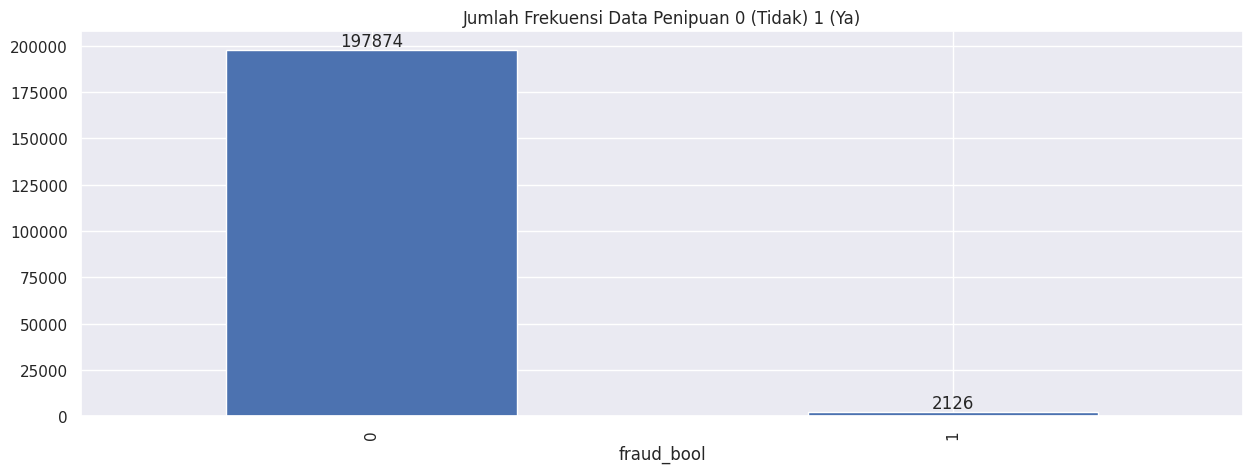

In [6]:
plot = df["fraud_bool"].value_counts()
ax = plot.plot.bar(figsize=(15, 5))
ax.set_title("Jumlah Frekuensi Data Penipuan 0 (Tidak) 1 (Ya)")

for container in ax.containers:
    ax.bar_label(container)

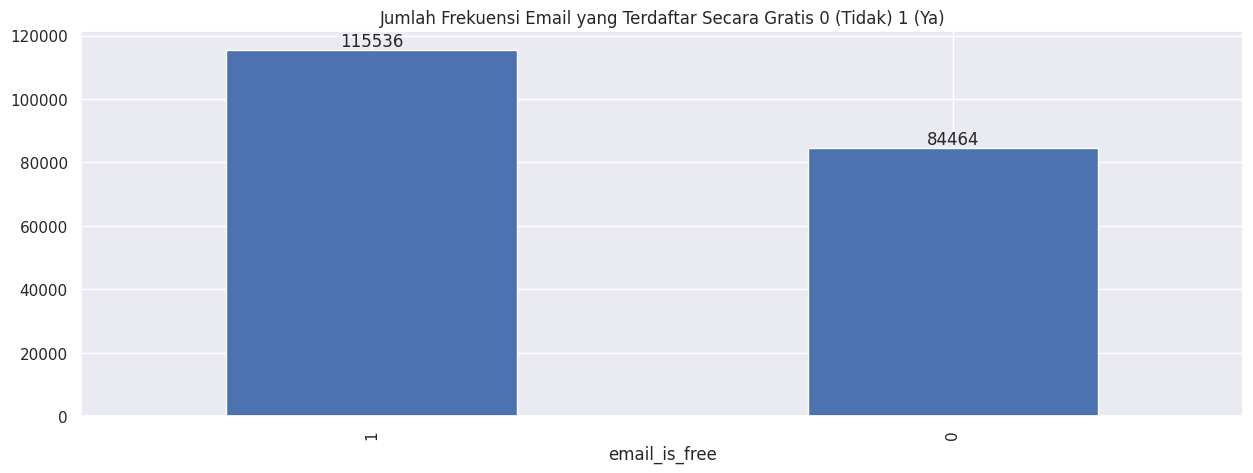

In [7]:
plot = df["email_is_free"].value_counts()
ax = plot.plot.bar(figsize=(15, 5))
ax.set_title("Jumlah Frekuensi Email yang Terdaftar Secara Gratis 0 (Tidak) 1 (Ya)")

for container in ax.containers:
    ax.bar_label(container)

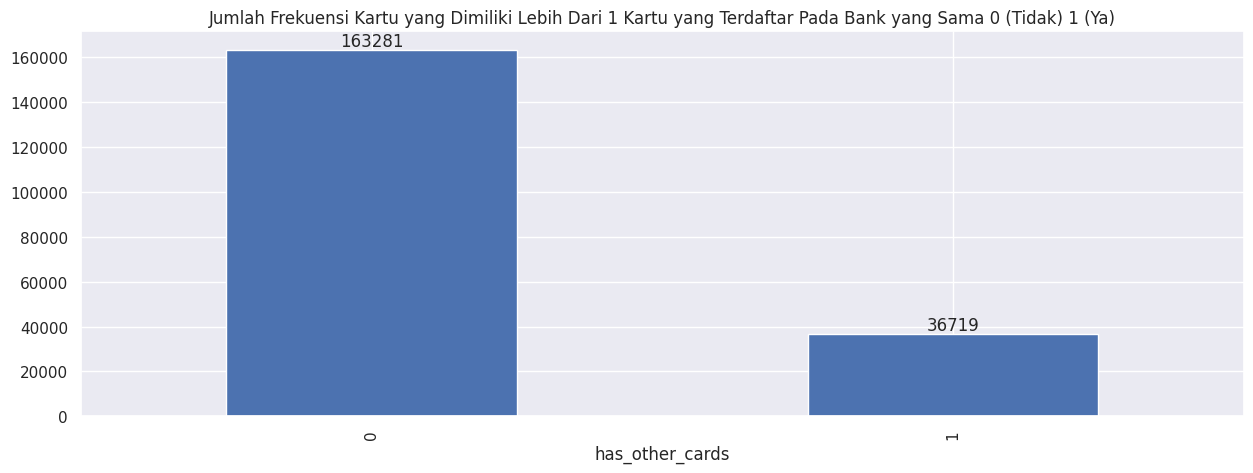

In [8]:
plot = df["has_other_cards"].value_counts()
ax = plot.plot.bar(figsize=(15, 5))
ax.set_title("Jumlah Frekuensi Kartu yang Dimiliki Lebih Dari 1 Kartu yang Terdaftar Pada Bank yang Sama 0 (Tidak) 1 (Ya)")

for container in ax.containers:
    ax.bar_label(container)

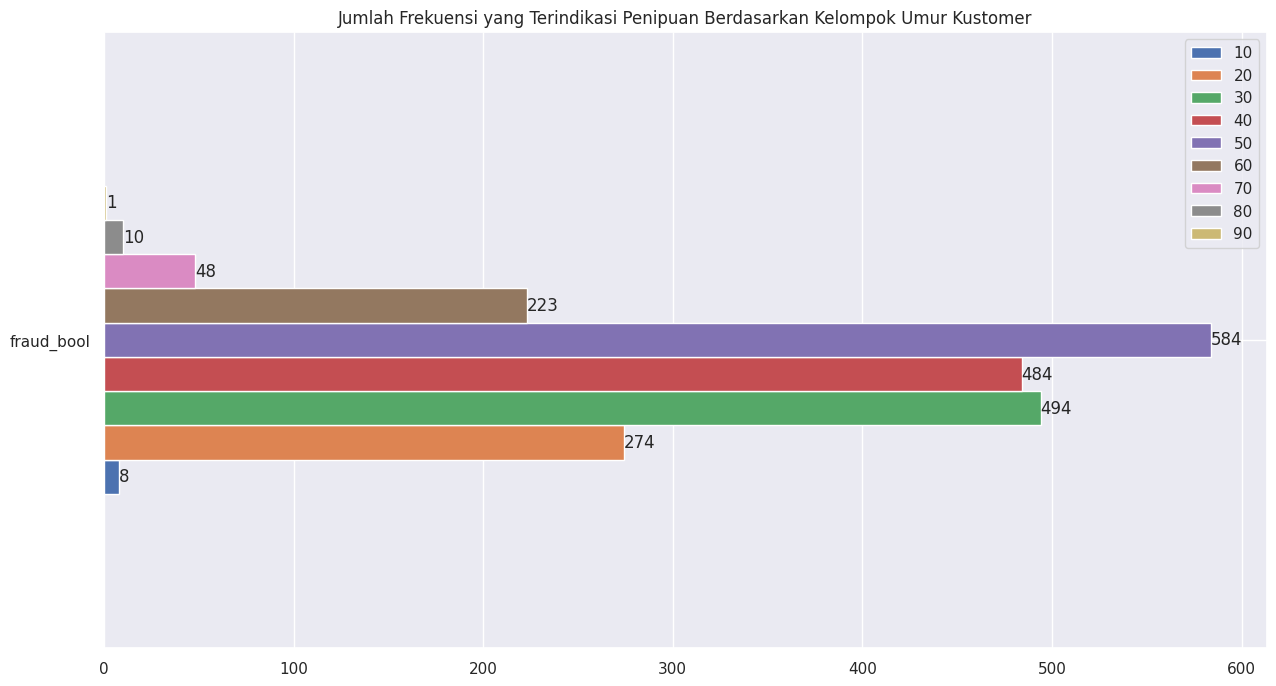

In [9]:
plot = pd.pivot_table(data=df, values="fraud_bool", columns="customer_age", aggfunc="sum")
ax = plot.plot.barh(figsize=(15, 8))
ax.set_title("Jumlah Frekuensi yang Terindikasi Penipuan Berdasarkan Kelompok Umur Kustomer")
ax.legend(loc="upper right")

for container in ax.containers:
    ax.bar_label(container)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


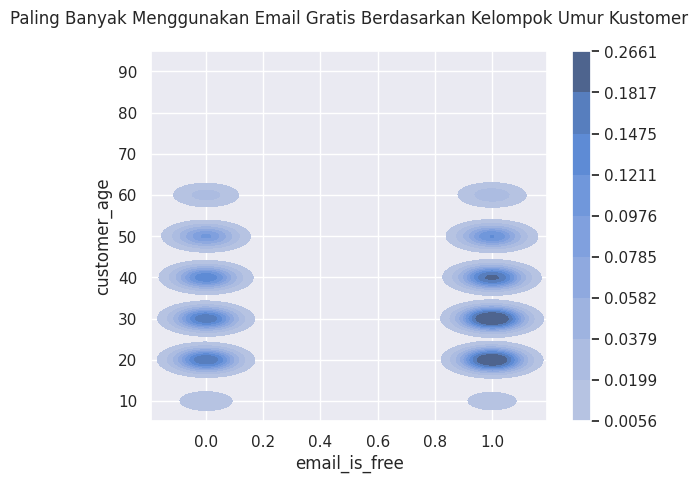

In [10]:
ax = sns.kdeplot(
    data=df,
    x="email_is_free",
    y="customer_age",
    cbar=True,
    fill=True
)
ax.set_title(
    "Paling Banyak Menggunakan Email Gratis Berdasarkan Kelompok Umur Kustomer",
    pad=20  # Atur jarak
)
plt.show()

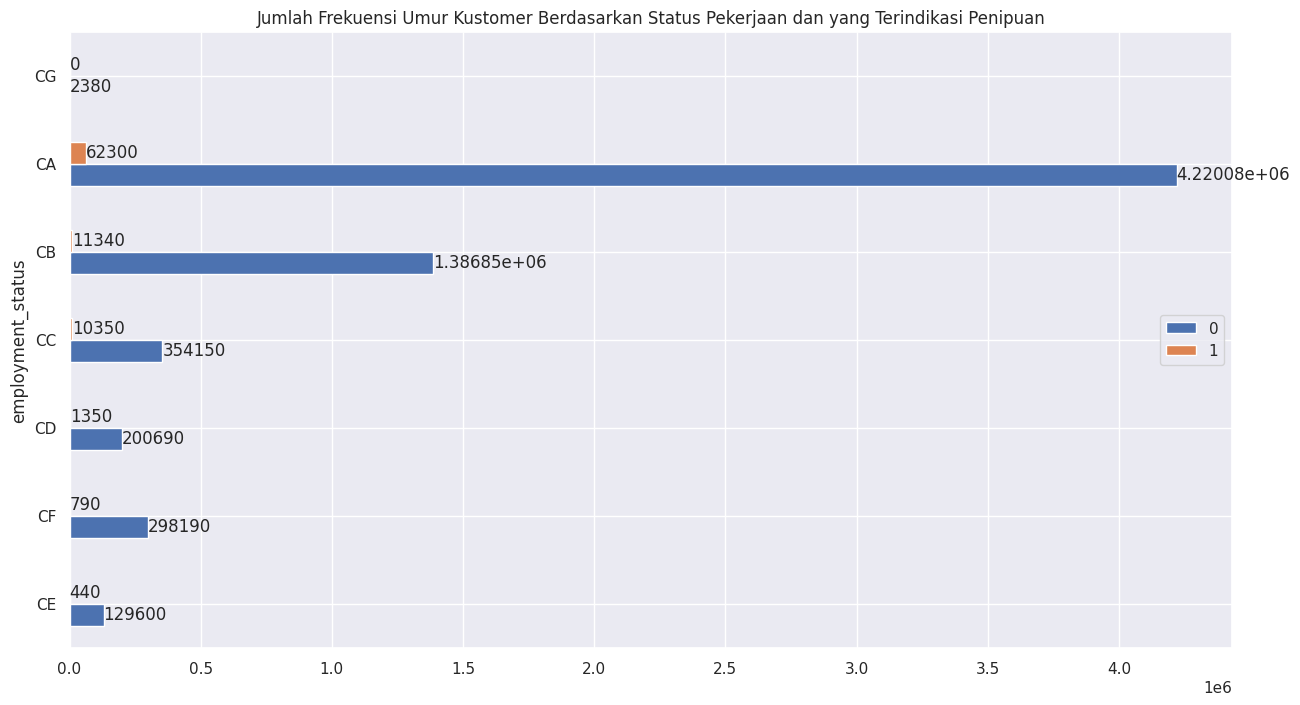

In [11]:
# Mengurutkan berdasarkan fitur fraud_bool 1
plot = df.groupby(["employment_status", "fraud_bool"])["customer_age"].sum().unstack().sort_values(by=1, ascending=True)
ax = plot.plot.barh(figsize=(15, 8))
ax.set_title("Jumlah Frekuensi Umur Kustomer Berdasarkan Status Pekerjaan dan yang Terindikasi Penipuan")
ax.legend(loc="center right")

for container in ax.containers:
    ax.bar_label(container)

In [12]:
categorical_features = df.select_dtypes(include=['object', 'category']).columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

In [13]:
def print_counts_categorical_features(df):
    for col in categorical_features:
        plt.figure(figsize=(8, 5))
        counts = df[col].value_counts(dropna=False)
        counts.plot(kind='bar')
        plt.title(f'Distribusi Frekuensi Kategori: {col}')
        plt.xlabel(col)
        plt.ylabel('Jumlah')
        plt.xticks(rotation=45, ha='right')
        
        for i, count in enumerate(counts):
            plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=9)
            
        plt.tight_layout()
        plt.show()

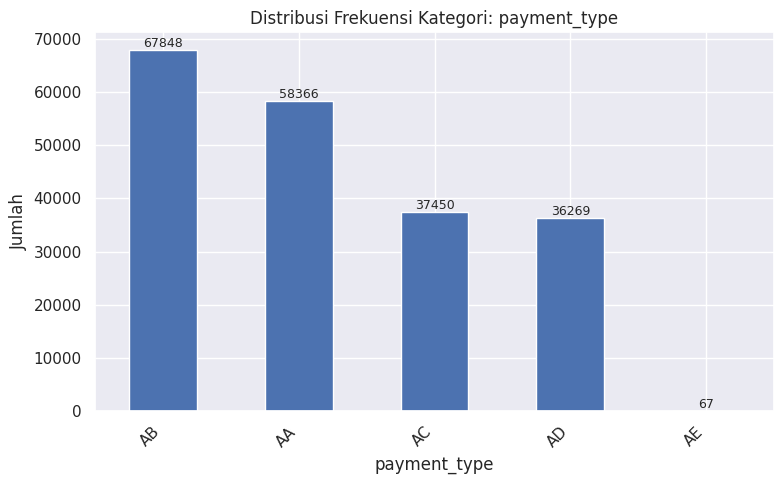

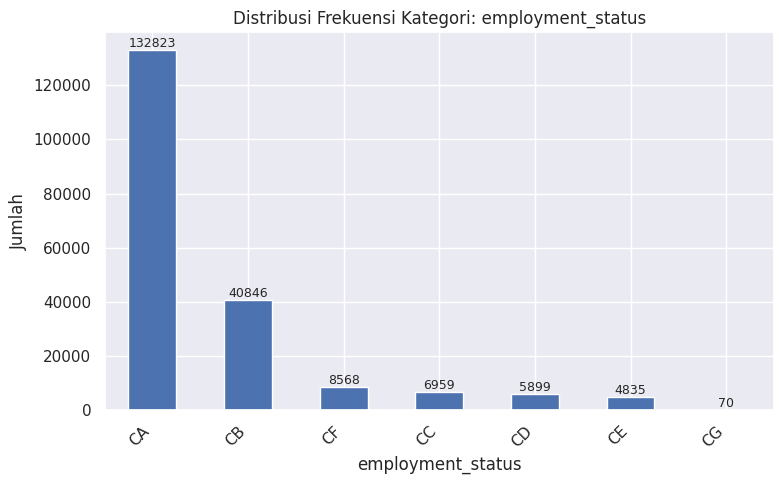

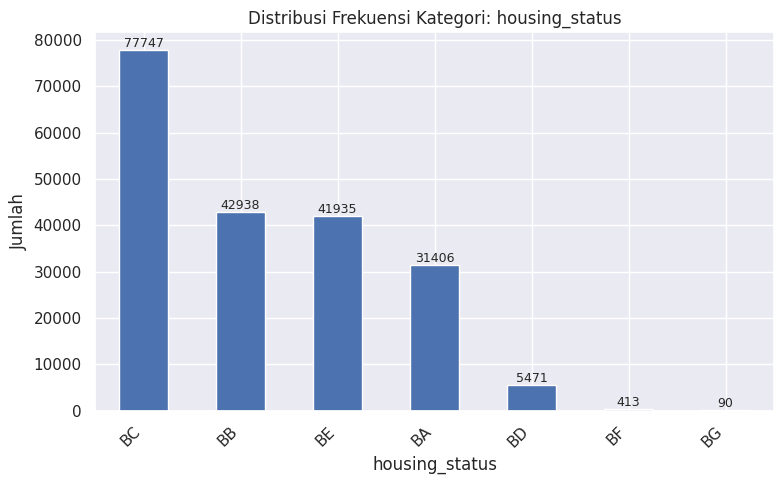

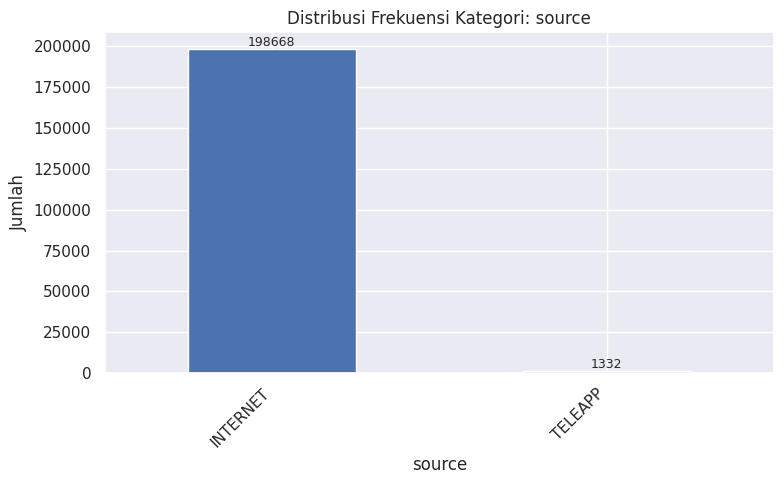

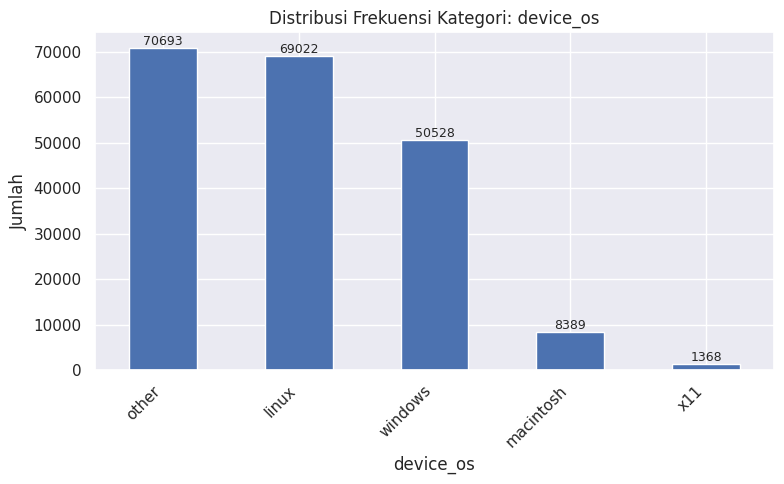

In [14]:
print_counts_categorical_features(df)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

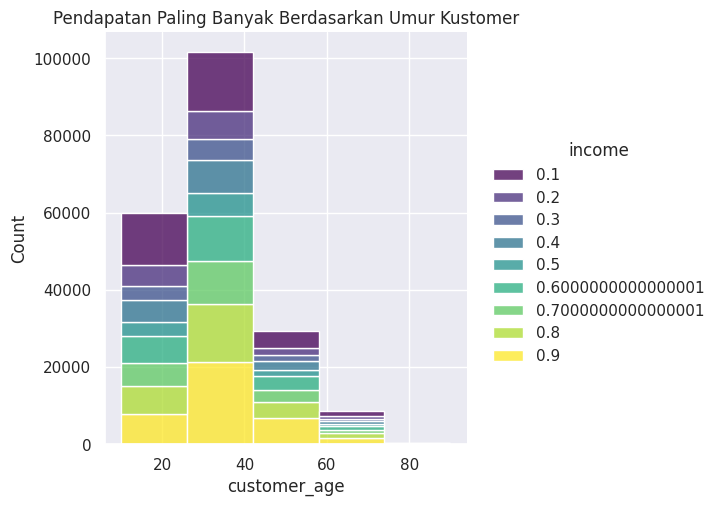

In [15]:
sns.displot(
    data=df, 
    bins=5, 
    x="customer_age", 
    hue="income", 
    multiple="stack", 
    palette="viridis").set(title="Pendapatan Paling Banyak Berdasarkan Umur Kustomer");

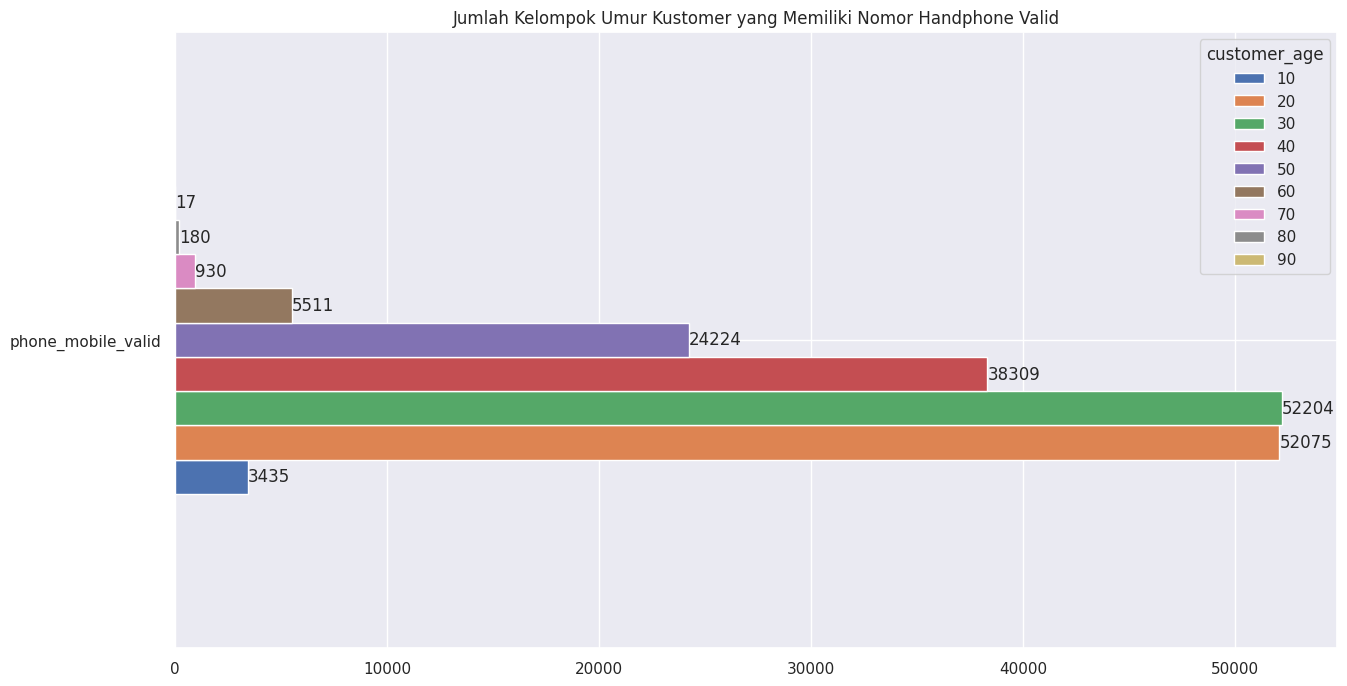

In [16]:
plot = pd.pivot_table(data=df, values="phone_mobile_valid", columns="customer_age", aggfunc="sum")
ax = plot.plot.barh(figsize=(15, 8))
ax.set_title("Jumlah Kelompok Umur Kustomer yang Memiliki Nomor Handphone Valid")

for container in ax.containers:
    ax.bar_label(container)

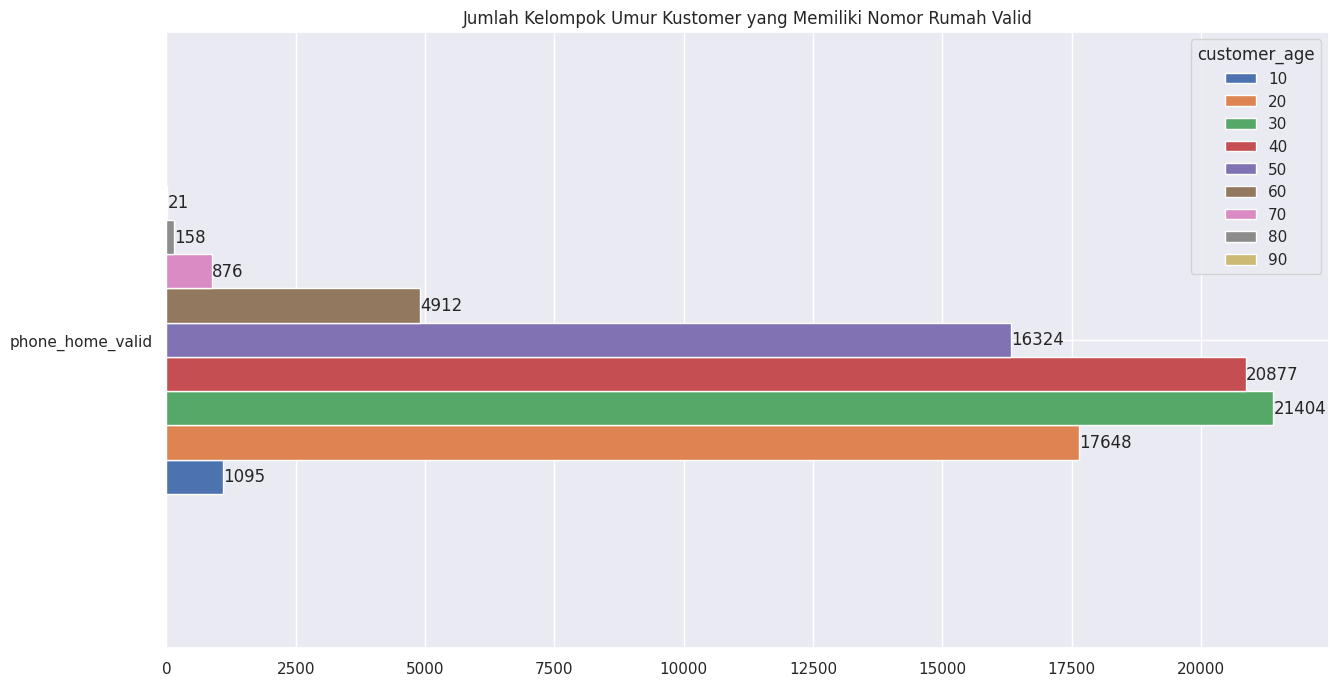

In [17]:
plot = pd.pivot_table(data=df, values="phone_home_valid", columns="customer_age", aggfunc="sum")
ax = plot.plot.barh(figsize=(15, 8))
ax.set_title("Jumlah Kelompok Umur Kustomer yang Memiliki Nomor Rumah Valid")

for container in ax.containers:
    ax.bar_label(container)

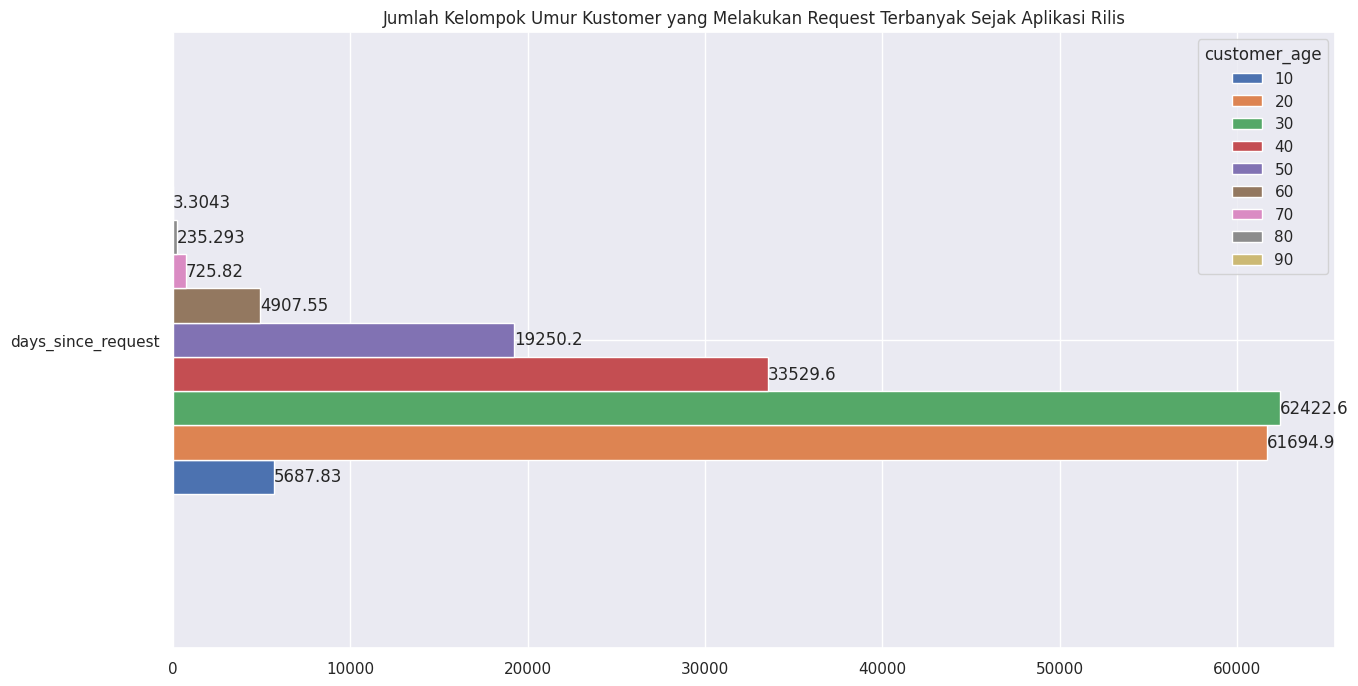

In [18]:
plot = pd.pivot_table(data=df, values="days_since_request", columns="customer_age", aggfunc="sum")
ax = plot.plot.barh(figsize=(15, 8))
ax.set_title("Jumlah Kelompok Umur Kustomer yang Melakukan Request Terbanyak Sejak Aplikasi Rilis")

for container in ax.containers:
    ax.bar_label(container)

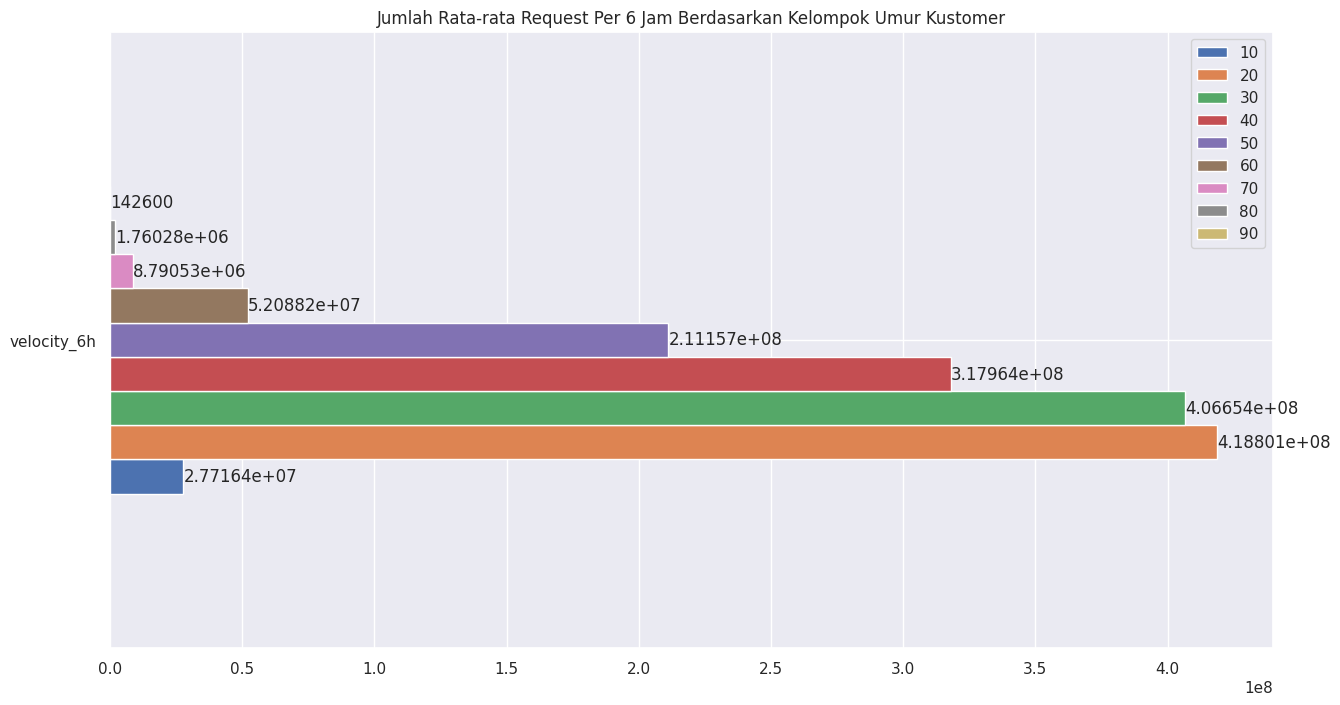

In [19]:
plot = pd.pivot_table(data=df, values="velocity_6h", columns="customer_age", aggfunc="sum")
ax = plot.plot.barh(figsize=(15, 8))
ax.set_title("Jumlah Rata-rata Request Per 6 Jam Berdasarkan Kelompok Umur Kustomer")
ax.legend(loc="upper right")

for container in ax.containers:
    ax.bar_label(container)

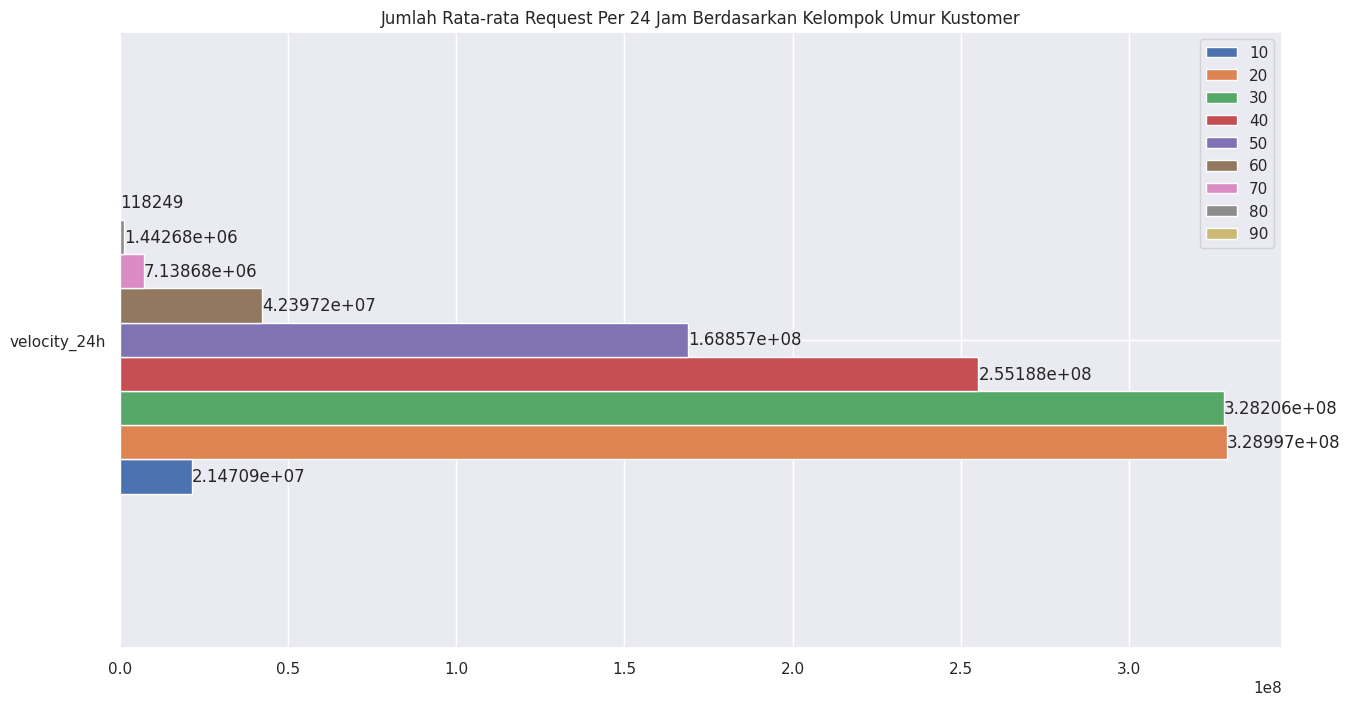

In [20]:
plot = pd.pivot_table(data=df, values="velocity_24h", columns="customer_age", aggfunc="sum")
ax = plot.plot.barh(figsize=(15, 8))
ax.set_title("Jumlah Rata-rata Request Per 24 Jam Berdasarkan Kelompok Umur Kustomer")
ax.legend(loc="upper right")

for container in ax.containers:
    ax.bar_label(container)

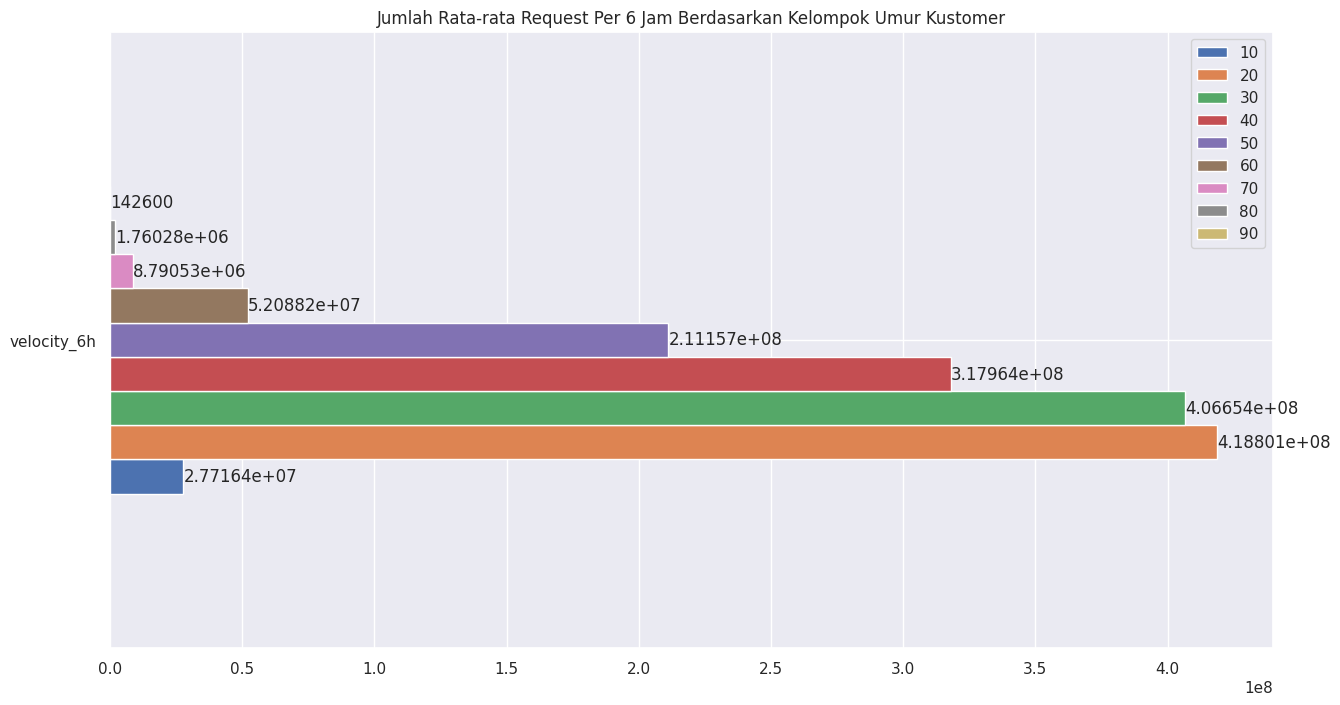

In [21]:
plot = pd.pivot_table(data=df, values="velocity_6h", columns="customer_age", aggfunc="sum")
ax = plot.plot.barh(figsize=(15, 8))
ax.set_title("Jumlah Rata-rata Request Per 6 Jam Berdasarkan Kelompok Umur Kustomer")
ax.legend(loc="upper right")

for container in ax.containers:
    ax.bar_label(container)

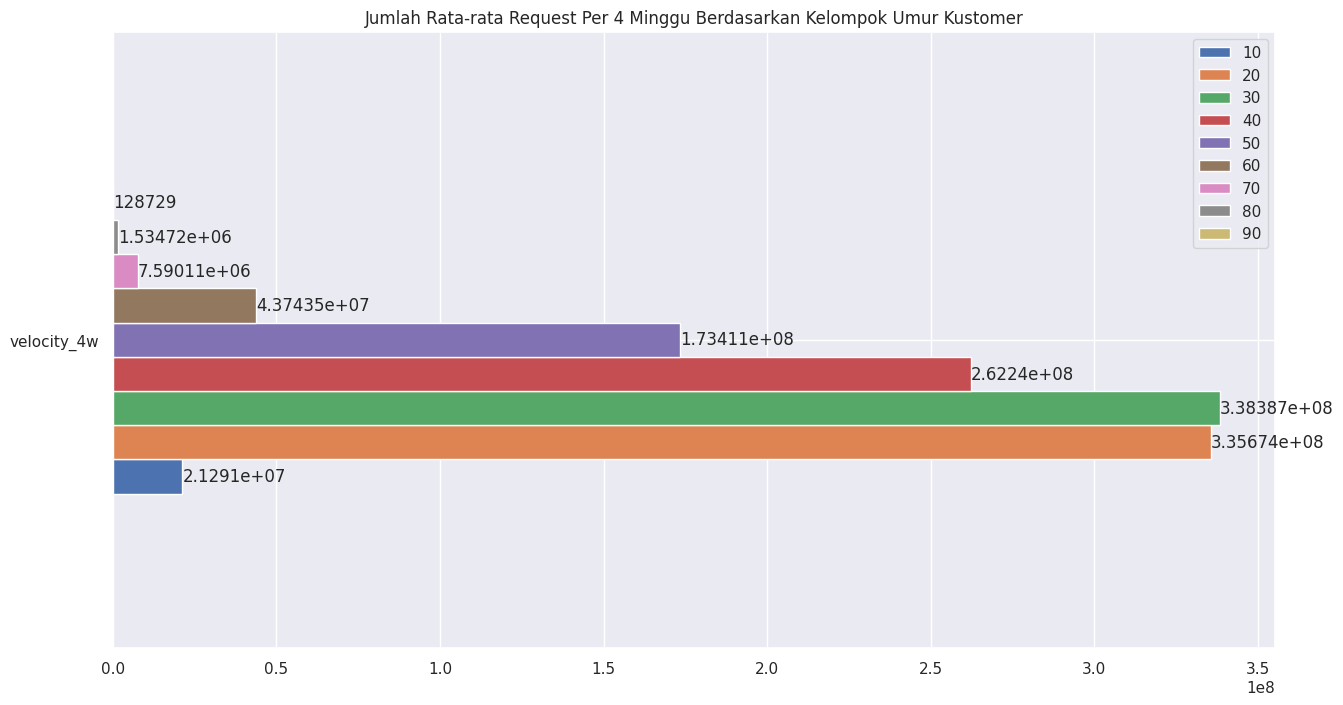

In [22]:
plot = pd.pivot_table(data=df, values="velocity_4w", columns="customer_age", aggfunc="sum")
ax = plot.plot.barh(figsize=(15, 8))
ax.set_title("Jumlah Rata-rata Request Per 4 Minggu Berdasarkan Kelompok Umur Kustomer")
ax.legend(loc="upper right")

for container in ax.containers:
    ax.bar_label(container)

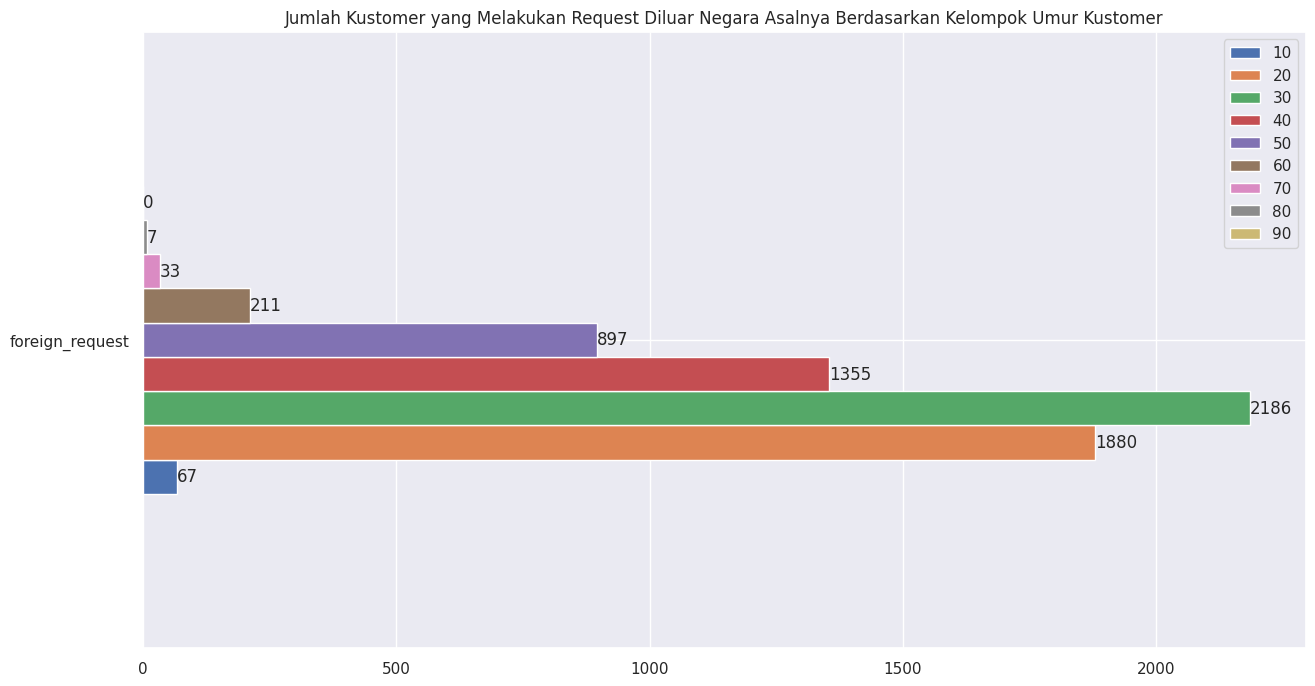

In [23]:
plot = pd.pivot_table(data=df, values="foreign_request", columns="customer_age", aggfunc="sum")
ax = plot.plot.barh(figsize=(15, 8))
ax.set_title("Jumlah Kustomer yang Melakukan Request Diluar Negara Asalnya Berdasarkan Kelompok Umur Kustomer")
ax.legend(loc="upper right")

for container in ax.containers:
    ax.bar_label(container)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


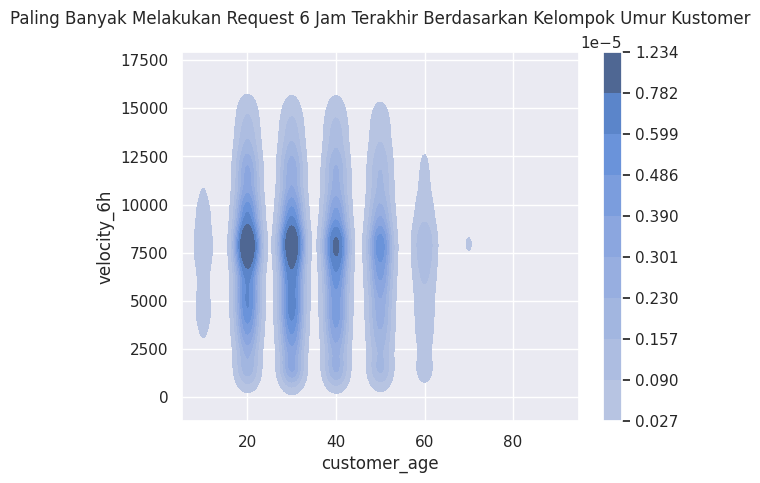

In [24]:
ax = sns.kdeplot(
    data=df,
    x="customer_age",
    y="velocity_6h",
    cbar=True,
    fill=True
)
ax.set_title(
    "Paling Banyak Melakukan Request 6 Jam Terakhir Berdasarkan Kelompok Umur Kustomer",
    pad=20  # Atur jarak
)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

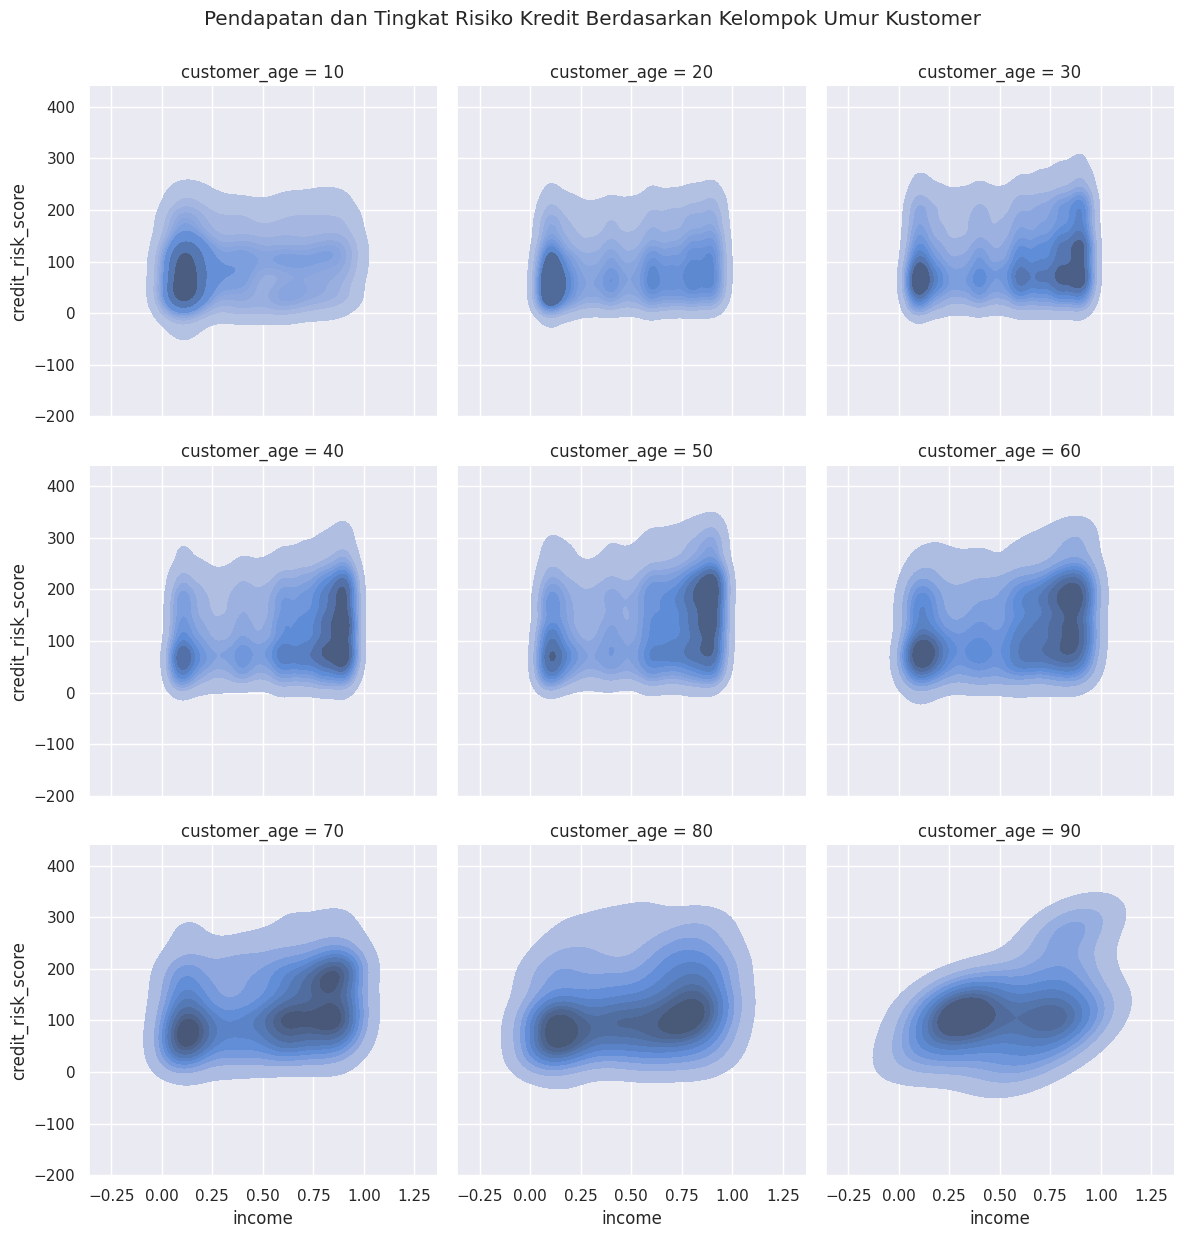

In [25]:
g = sns.FacetGrid(df, col="customer_age", height=4, col_wrap=3)
g.map(sns.kdeplot, "income", "credit_risk_score", fill=True)
g.figure.suptitle(
    "Pendapatan dan Tingkat Risiko Kredit Berdasarkan Kelompok Umur Kustomer",
    y=1.03,  # Atur posisi vertikal judul agar tidak menimpa judul subplot
);

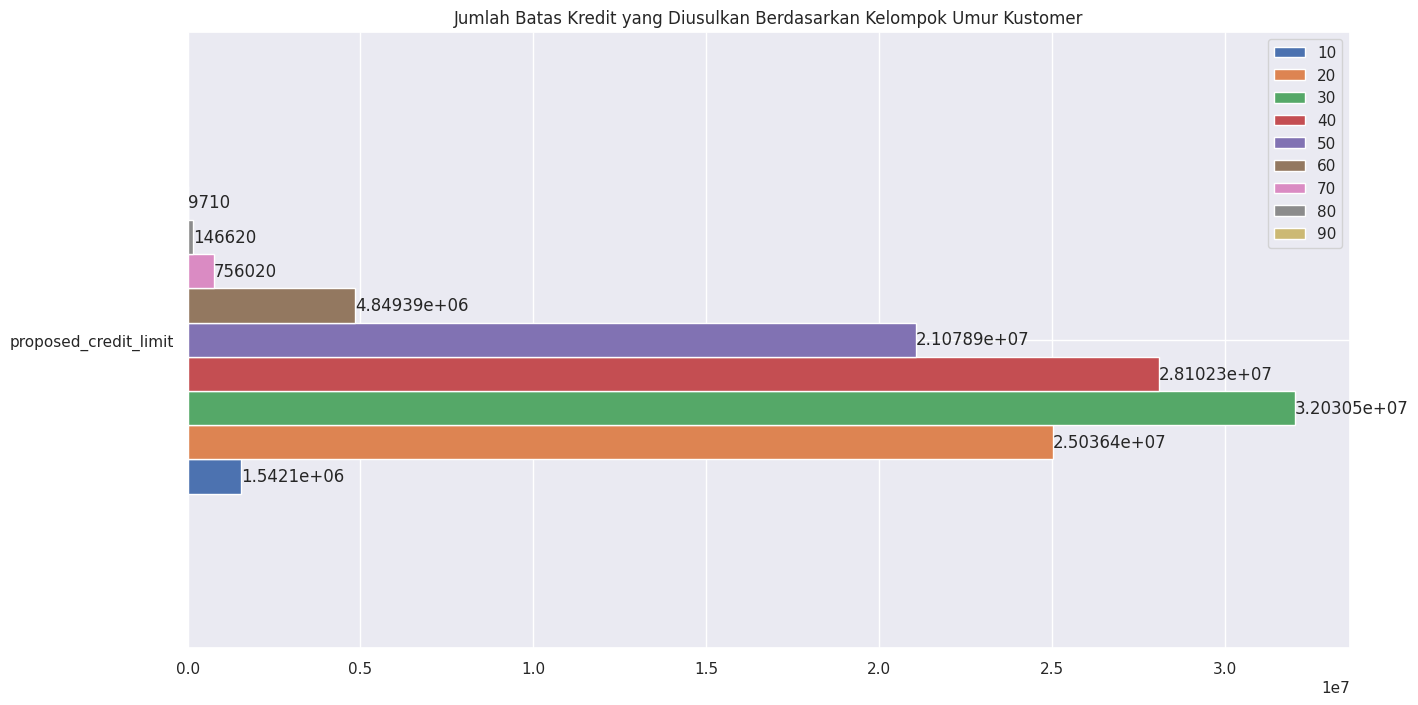

In [26]:
plot = pd.pivot_table(data=df, values="proposed_credit_limit", columns="customer_age", aggfunc="sum")
ax = plot.plot.barh(figsize=(15, 8))
ax.set_title("Jumlah Batas Kredit yang Diusulkan Berdasarkan Kelompok Umur Kustomer")
ax.legend(loc="upper right")

for container in ax.containers:
    ax.bar_label(container)

In [27]:
pivot_table = pd.pivot_table(data=df, values="intended_balcon_amount", index="employment_status", columns="customer_age", aggfunc="sum")
pivot_table

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


customer_age,10,20,30,40,50,60,70,80,90
employment_status,,,,,,,,,
CA,40849.135002,398366.366257,404005.944887,274094.487102,182372.590922,29349.265037,4261.372792,778.915244,61.680370
CB,4428.285523,96135.338577,133619.033642,90890.470184,52905.587323,13931.113632,3306.536778,433.899264,72.081264
CC,146.070094,2225.705514,2892.437521,4658.424891,16528.111924,15269.675795,3925.968057,1178.982478,95.621568
CD,524.722790,8770.111852,9276.418304,7948.205562,6233.688817,1228.497620,94.288081,4.950899,NaN
CE,5450.404809,35716.942139,11105.288645,8057.795302,5647.167170,1288.332608,490.985384,118.467623,NaN
CF,171.094419,10301.834118,14669.475432,12507.104339,9820.382624,1769.868631,600.809985,133.871097,-1.457200
CG,NaN,135.780080,305.936553,131.557801,146.789068,NaN,NaN,NaN,NaN


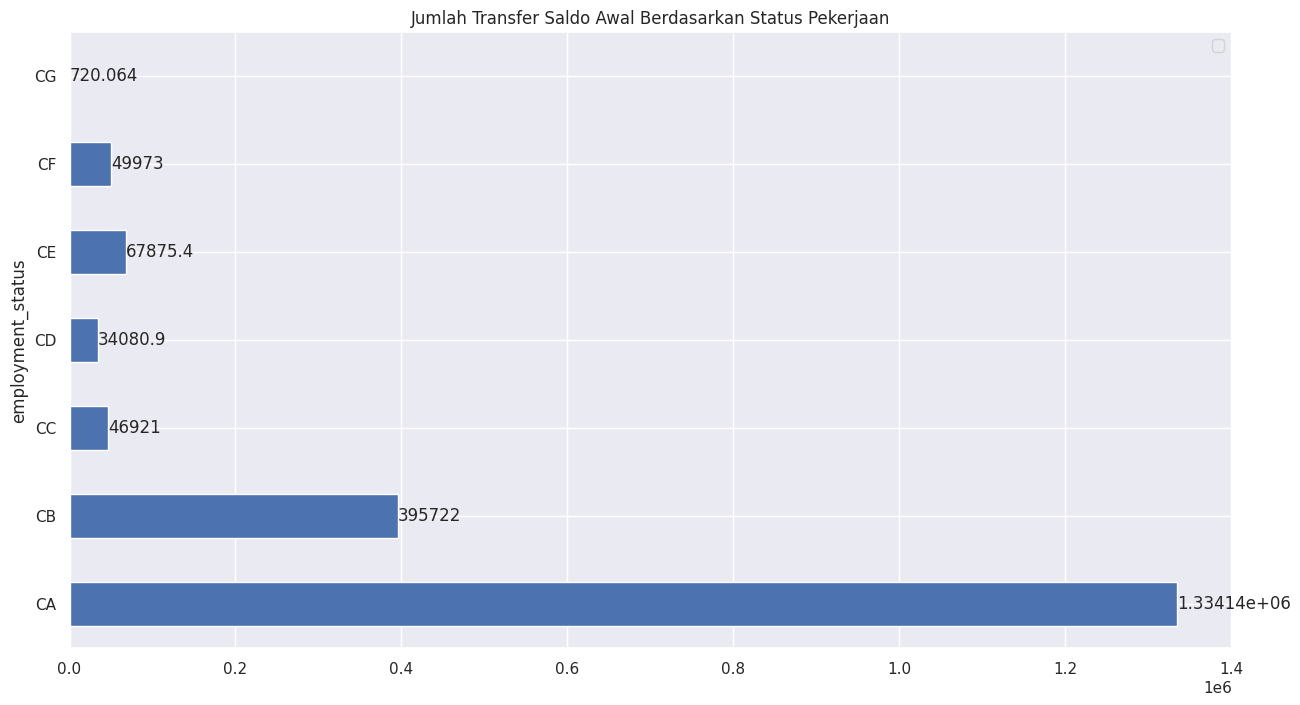

In [28]:
ax = pivot_table.sum(axis=1).plot.barh(figsize=(15, 8))
ax.set_title("Jumlah Transfer Saldo Awal Berdasarkan Status Pekerjaan")
ax.legend(loc="upper right")

for container in ax.containers:
    ax.bar_label(container)

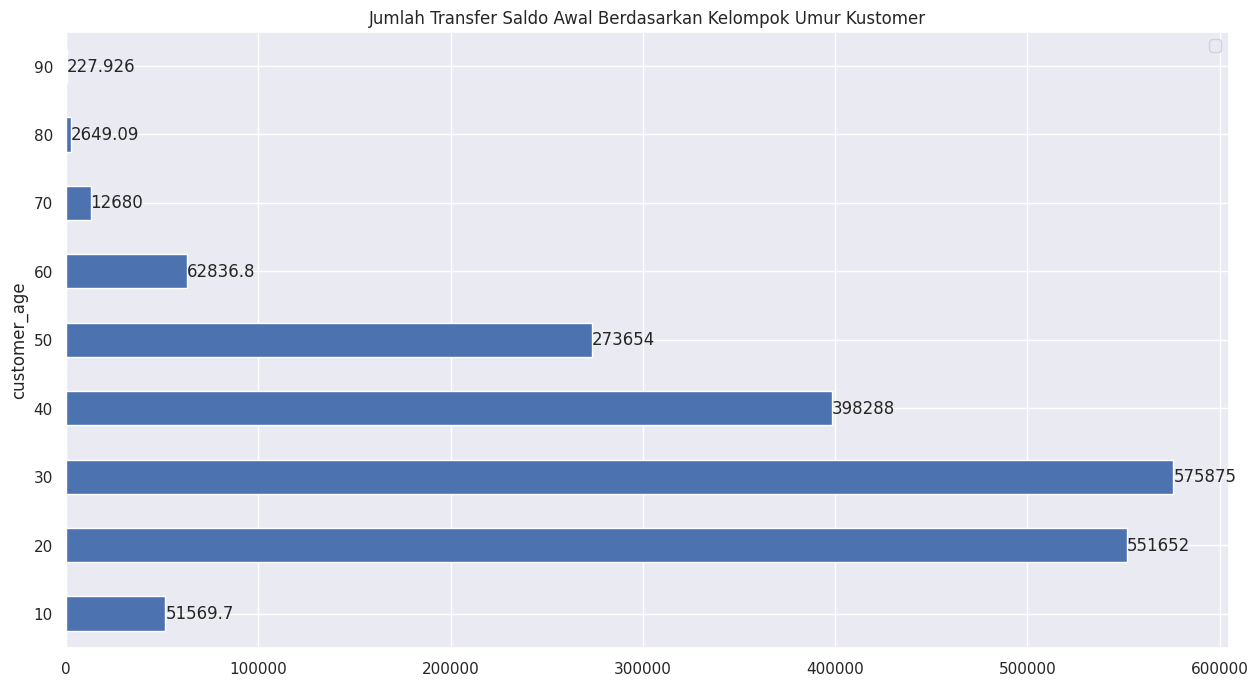

In [29]:
ax = pivot_table.sum(axis=0).plot.barh(figsize=(15, 8))
ax.set_title("Jumlah Transfer Saldo Awal Berdasarkan Kelompok Umur Kustomer")
ax.legend(loc="upper right")

for container in ax.containers:
    ax.bar_label(container)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight


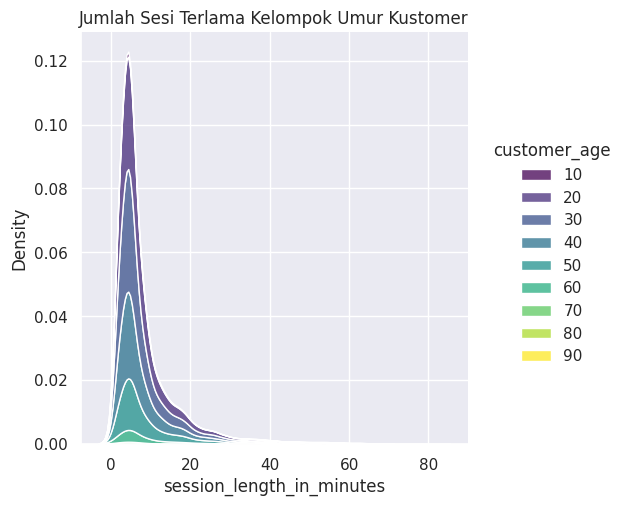

In [30]:
sns.displot(
    data=df,
    x="session_length_in_minutes",
    hue="customer_age",
    palette="viridis",
    multiple="stack",
    kind="kde")
plt.title("Jumlah Sesi Terlama Kelompok Umur Kustomer");

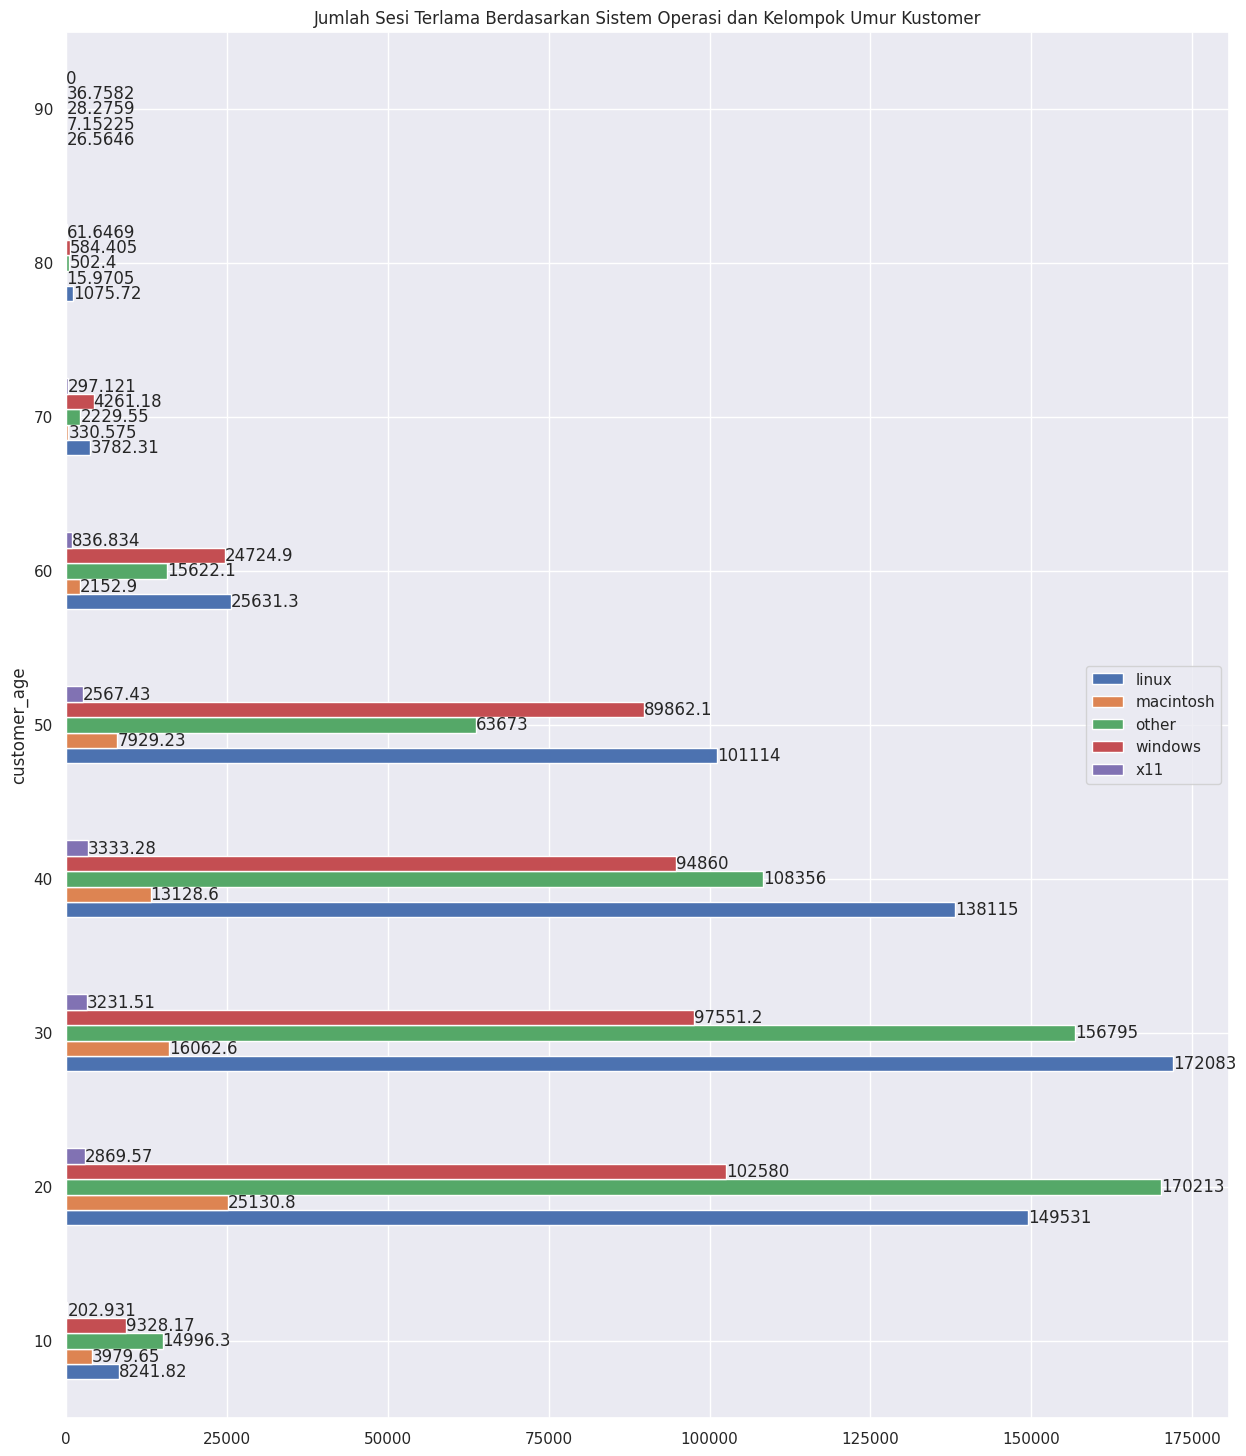

In [31]:
plot = df.groupby(["customer_age", "device_os"])["session_length_in_minutes"].sum().unstack()
ax = plot.plot.barh(figsize=(15, 18))
ax.set_title("Jumlah Sesi Terlama Berdasarkan Sistem Operasi dan Kelompok Umur Kustomer")
ax.legend(loc="center right")

for container in ax.containers:
    ax.bar_label(container)

# Data Preparation

In [32]:
data_duplicated = df.duplicated().sum()
print(f"Jumlah data duplikat = {data_duplicated} data")

Jumlah data duplikat = 0 data


In [33]:
categorical_features

Index(['payment_type', 'employment_status', 'housing_status', 'source',
       'device_os'],
      dtype='object')

#### Encoding Category

In [34]:
for feature in categorical_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
df

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,0,1059,...,0,1500.0,0,0,16.224843,0,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,3,1658,...,0,1500.0,0,0,3.363854,2,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,1,1095,...,0,200.0,0,0,22.730559,3,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,1,3483,...,0,200.0,0,0,15.215816,0,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,0,2339,...,0,200.0,0,0,3.743048,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0,0.5,0.528804,26,13,20,0.018300,51.504923,0,2074,...,0,200.0,0,0,3.871854,2,1,1,0,1
199996,0,0.4,0.079761,137,14,30,4.018075,-0.830555,2,1577,...,0,200.0,0,0,5.545133,2,1,1,0,1
199997,0,0.4,0.161715,-1,58,20,0.013512,-1.329180,1,2810,...,0,200.0,0,0,4.119012,2,1,1,0,1
199998,0,0.6,0.136501,25,4,20,0.003101,-1.465252,1,3215,...,0,200.0,0,0,3.060711,0,0,1,0,1


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


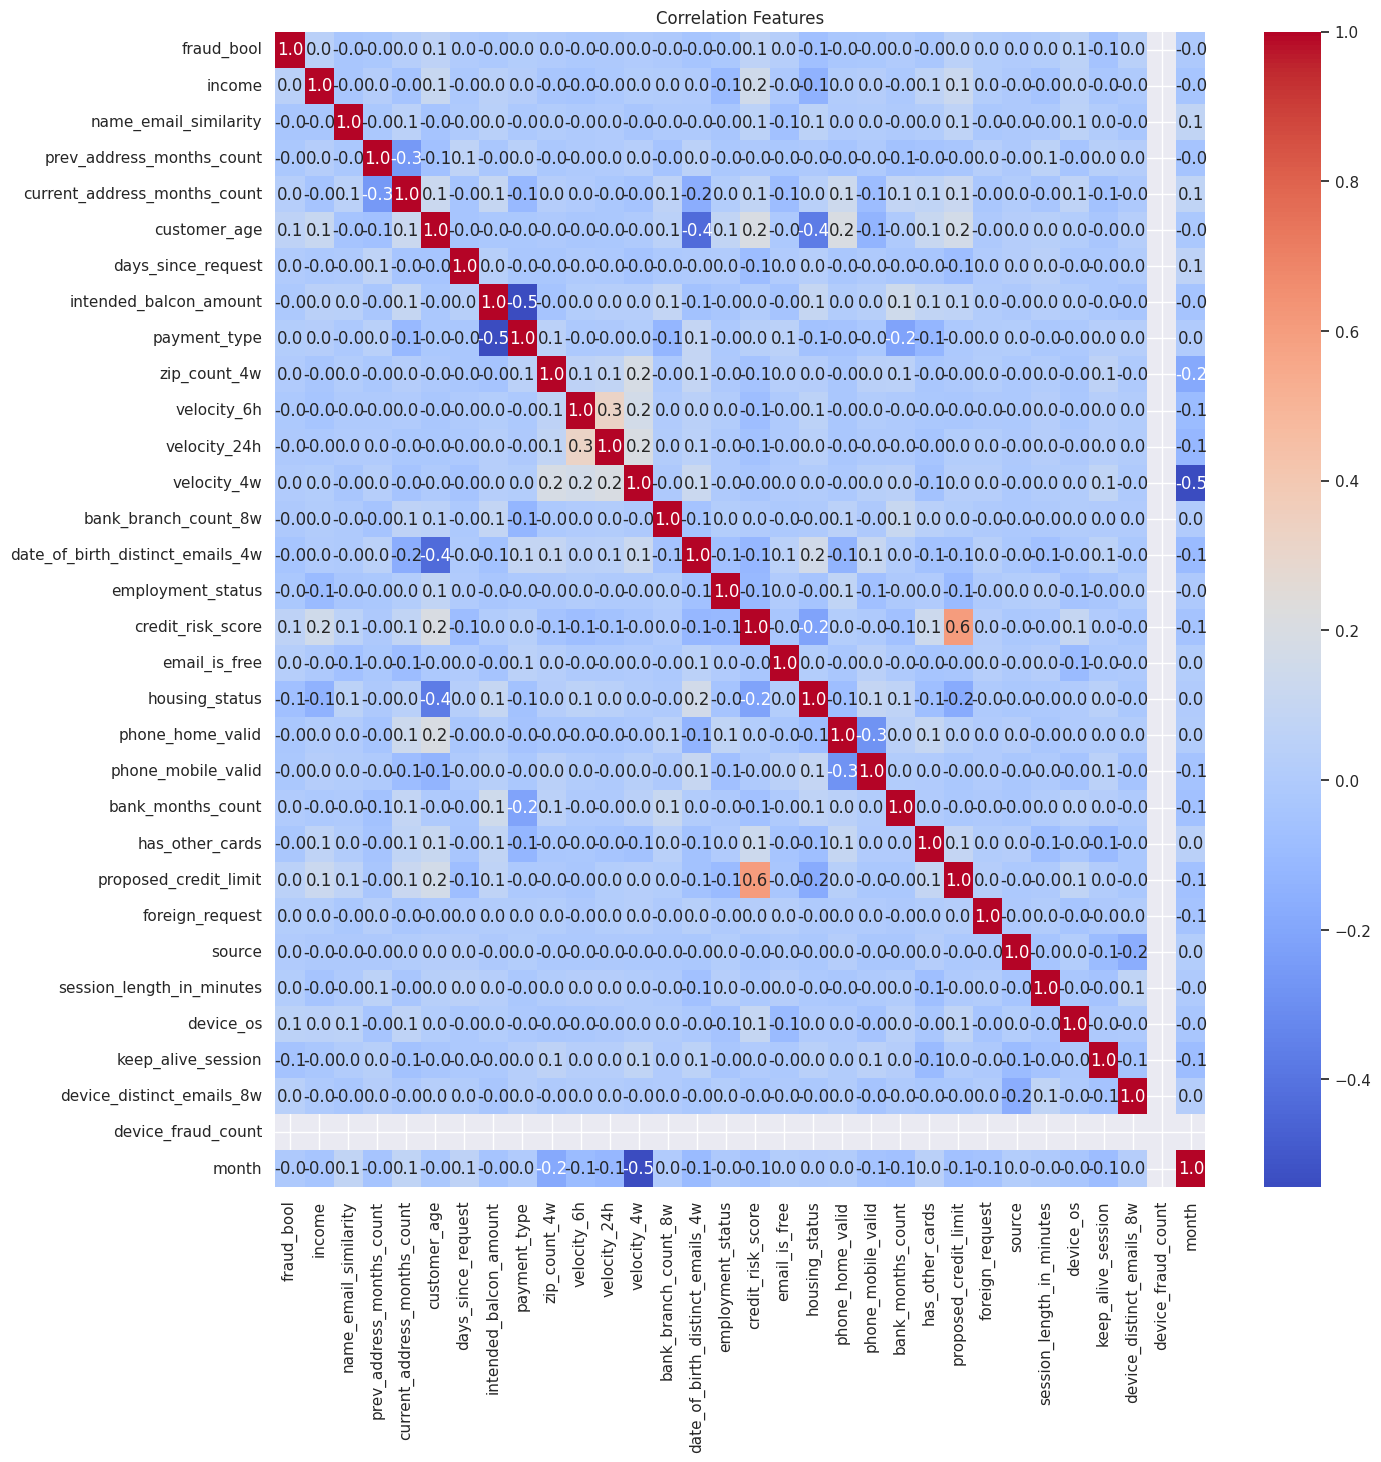

In [35]:
plt.figure(figsize=(15,15))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cbar=True, cmap="coolwarm", fmt=".1f").set(title="Correlation Features");

In [36]:
df

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,0,1059,...,0,1500.0,0,0,16.224843,0,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,3,1658,...,0,1500.0,0,0,3.363854,2,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,1,1095,...,0,200.0,0,0,22.730559,3,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,1,3483,...,0,200.0,0,0,15.215816,0,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,0,2339,...,0,200.0,0,0,3.743048,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0,0.5,0.528804,26,13,20,0.018300,51.504923,0,2074,...,0,200.0,0,0,3.871854,2,1,1,0,1
199996,0,0.4,0.079761,137,14,30,4.018075,-0.830555,2,1577,...,0,200.0,0,0,5.545133,2,1,1,0,1
199997,0,0.4,0.161715,-1,58,20,0.013512,-1.329180,1,2810,...,0,200.0,0,0,4.119012,2,1,1,0,1
199998,0,0.6,0.136501,25,4,20,0.003101,-1.465252,1,3215,...,0,200.0,0,0,3.060711,0,0,1,0,1


# Modeling

In [37]:
X = df.iloc[:, 1:]
y_label = df["fraud_bool"]

#### Feature Extraction

##### Menggunakan VarianceThreshold

In [38]:
selector = VarianceThreshold(threshold=0.1)
X_selected = selector.fit_transform(X)

selected_features_vt = X.columns[selector.get_support()]
print("Jumlah fitur yang terpilih : ", selected_features_vt.size)
print("Fitur yang dipilih setelah Variance Thresholding:", selected_features_vt.tolist())

Jumlah fitur yang terpilih :  25
Fitur yang dipilih setelah Variance Thresholding: ['prev_address_months_count', 'current_address_months_count', 'customer_age', 'days_since_request', 'intended_balcon_amount', 'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'employment_status', 'credit_risk_score', 'email_is_free', 'housing_status', 'phone_home_valid', 'phone_mobile_valid', 'bank_months_count', 'has_other_cards', 'proposed_credit_limit', 'session_length_in_minutes', 'device_os', 'keep_alive_session', 'month']


##### Menggunakan SelectKBest

In [39]:
k_best = SelectKBest(score_func=f_classif, k=5)
k_best.fit(X, df['fraud_bool'])

selected_features_kbest = X.columns[k_best.get_support()]
print("Jumlah fitur yang terpilih : ", selected_features_kbest.size)
print("Fitur yang dipilih setelah SelectKBest:", selected_features_kbest.tolist())

Jumlah fitur yang terpilih :  5
Fitur yang dipilih setelah SelectKBest: ['customer_age', 'credit_risk_score', 'housing_status', 'device_os', 'keep_alive_session']


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [29] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


##### Menggunakan Recursive Model Elimination (RFE)

In [40]:
model = RandomForestClassifier()

rfe_selector = RFE(model, n_features_to_select=5)
rfe_selector.fit_transform(X.iloc[:1000, :], df['fraud_bool'][:1000])

selected_features_rfe = X.columns[rfe_selector.get_support(indices=True)]
print("Jumlah fitur yang terpilih : ", selected_features_rfe.size)
print("Fitur yang dipilih dengan RFE:", selected_features_rfe.tolist())

Jumlah fitur yang terpilih :  5
Fitur yang dipilih dengan RFE: ['name_email_similarity', 'current_address_months_count', 'zip_count_4w', 'velocity_24h', 'session_length_in_minutes']


In [41]:
def print_accuracy_with_result_feature_extraction():
    result = { 
            "Variance Thresholding": 0.0,
            "SelectKBest": 0.0,
            "RFE": 0.0
         }

    for method, selected_features in {
        "Variance Thresholding": selected_features_vt,
        "SelectKBest": selected_features_kbest,
        "RFE": selected_features_rfe
    }.items():
        df_selected = df[selected_features]
        # Tanpa PCA
        model = RandomForestClassifier()
        model.fit(df_selected, df["fraud_bool"])
        y_pred = model.predict(df_selected)
        acc = accuracy_score(df["fraud_bool"], y_pred)
        result[method] = acc
        print(f"Accuracy model random forest tanpa PCA = {result}")

In [42]:
print_accuracy_with_result_feature_extraction()

Accuracy model random forest tanpa PCA = {'Variance Thresholding': 0.999975, 'SelectKBest': 0.0, 'RFE': 0.0}
Accuracy model random forest tanpa PCA = {'Variance Thresholding': 0.999975, 'SelectKBest': 0.99125, 'RFE': 0.0}
Accuracy model random forest tanpa PCA = {'Variance Thresholding': 0.999975, 'SelectKBest': 0.99125, 'RFE': 0.999935}


In [43]:
df = df[selected_features_kbest]
df

,customer_age,credit_risk_score,housing_status,device_os,keep_alive_session
0,40,163,2,0,1
1,20,154,2,2,1
2,40,89,2,3,0
3,30,90,2,0,1
4,40,91,2,2,0
...,...,...,...,...,...
199995,20,124,2,2,1
199996,30,8,1,2,1
199997,20,76,4,2,1
199998,20,158,2,0,0


In [44]:
numerical_features = df

#### Outlier

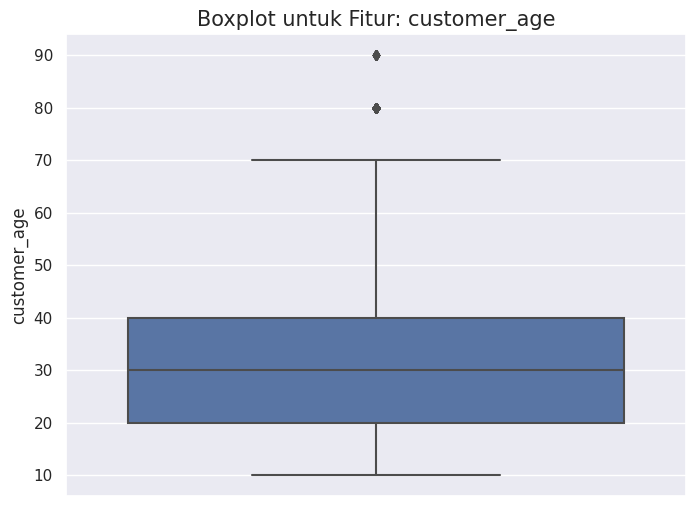

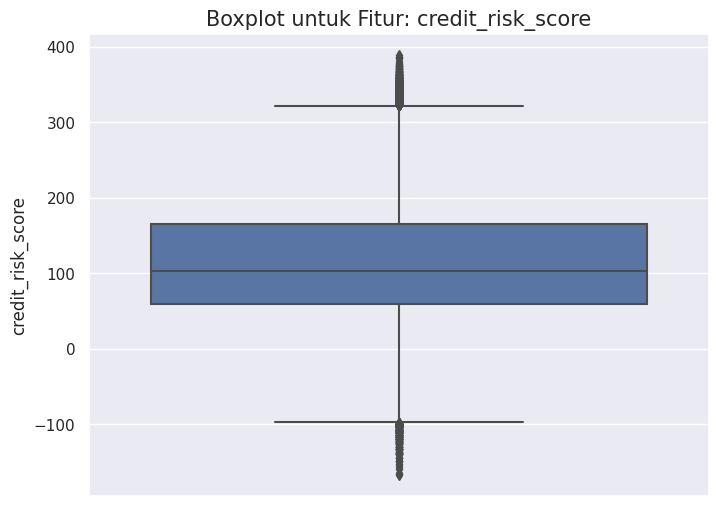

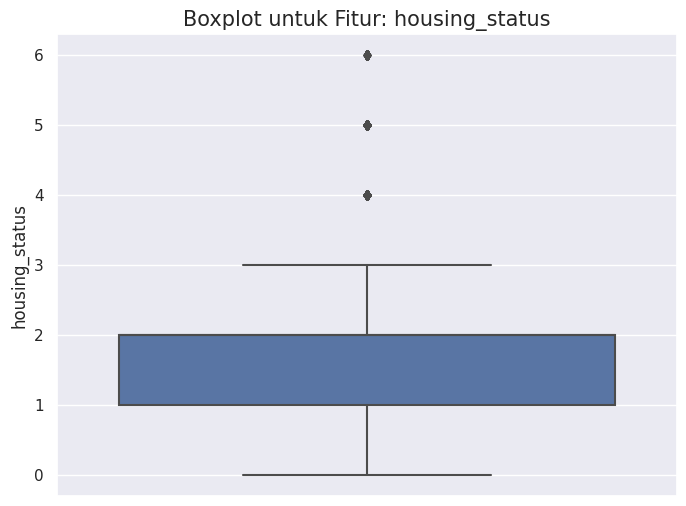

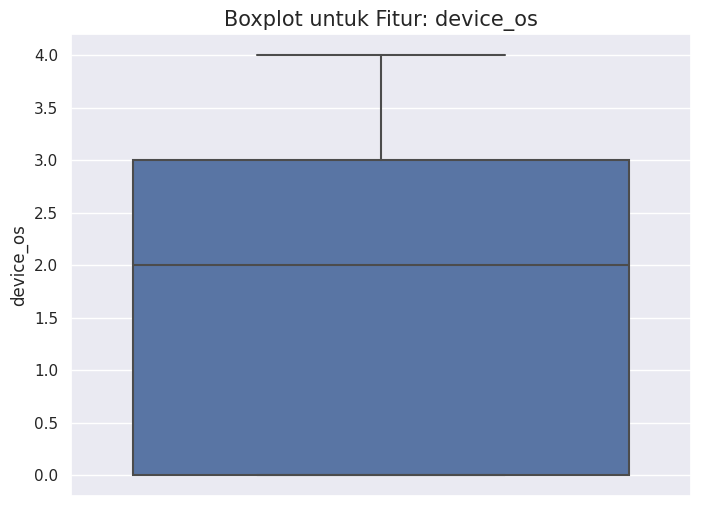

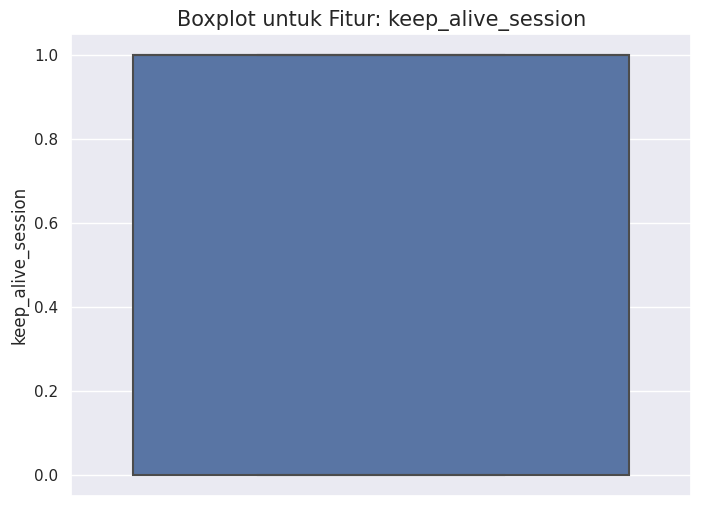

In [45]:
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, y=col)
    plt.title(f"Boxplot untuk Fitur: {col}", fontsize=15)
    plt.show()

In [46]:
categorical_features = df.select_dtypes(include=['object', 'category']).columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

In [47]:
categorical_features

Index([], dtype='object')

In [48]:
numerical_features

Index(['customer_age', 'credit_risk_score', 'housing_status', 'device_os',
       'keep_alive_session'],
      dtype='object')

In [49]:
def print_counts_numerical_features(df):
    for col in numerical_features:
        plt.figure(figsize=(8, 5))
        plt.boxplot(data=df, x=col)
        plt.title(f'{col}')
        plt.show()

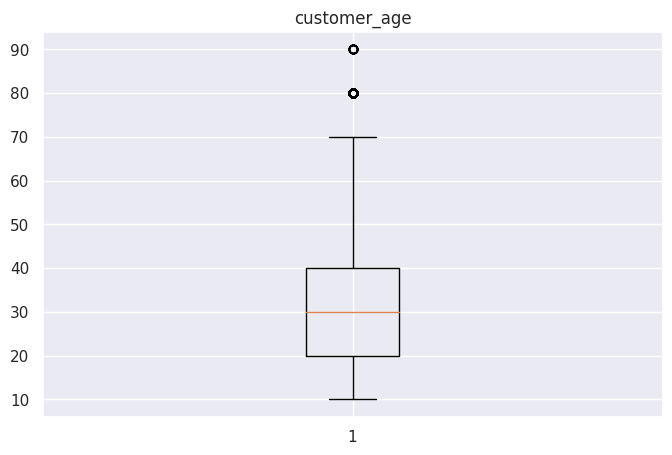

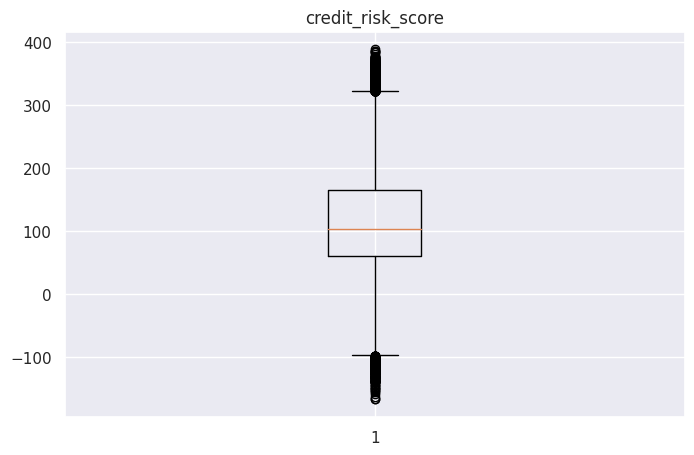

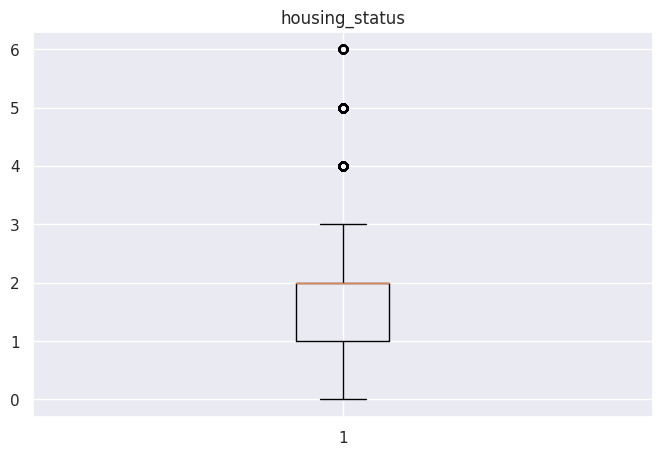

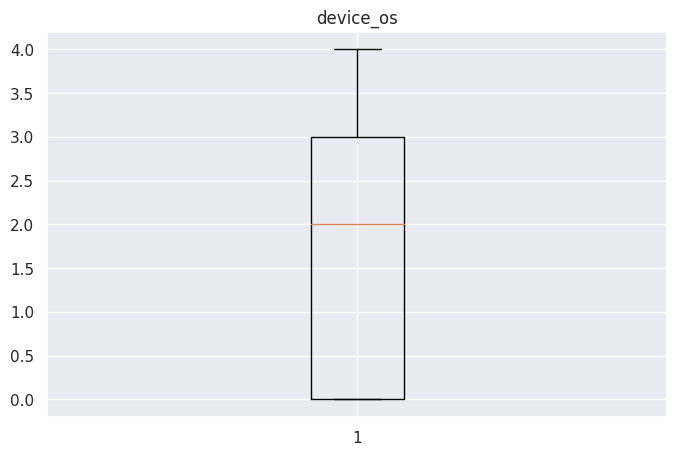

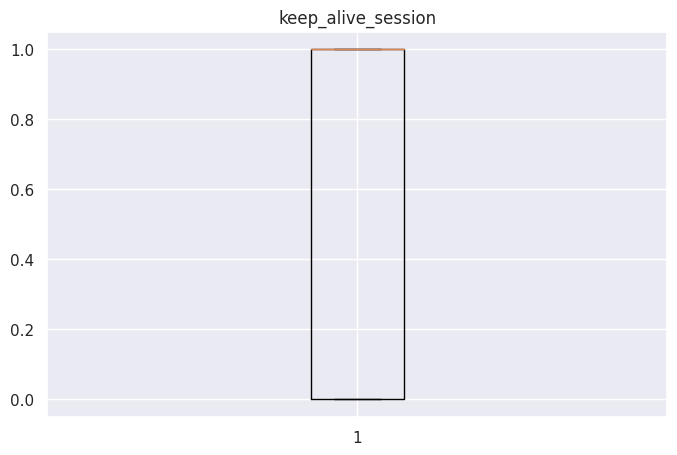

In [50]:
print_counts_numerical_features(df)

In [51]:
numerical_features

Index(['customer_age', 'credit_risk_score', 'housing_status', 'device_os',
       'keep_alive_session'],
      dtype='object')

In [52]:
Q1 = df["customer_age"].quantile(0.25)
Q3 = df["customer_age"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df["customer_age"] >= lower_bound) & (df["customer_age"] <= upper_bound)]
print(f"Jumlah data setelah menghapus outlier: {len(df)} data")


Jumlah data setelah menghapus outlier: 199714 data


<Axes: xlabel='customer_age'>

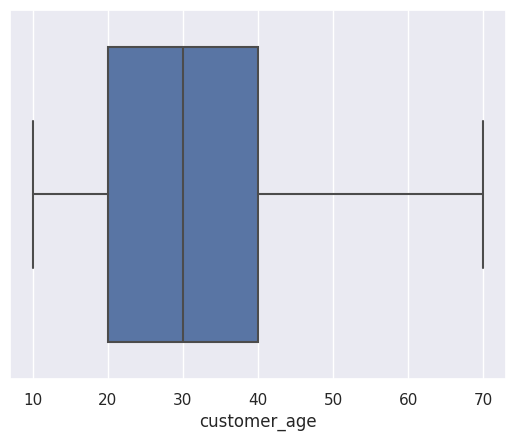

In [53]:
sns.boxplot(data=df, x="customer_age")

In [54]:
Q1 = df["credit_risk_score"].quantile(0.25)
Q3 = df["credit_risk_score"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df["credit_risk_score"] >= lower_bound) & (df["credit_risk_score"] <= upper_bound)]
print(f"Jumlah data setelah menghapus outlier: {len(df)} data")


Jumlah data setelah menghapus outlier: 198365 data


<Axes: xlabel='credit_risk_score'>

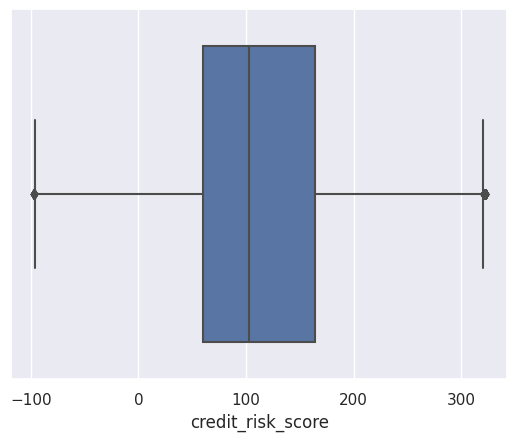

In [55]:
sns.boxplot(data=df, x="credit_risk_score")

In [56]:
Q1 = df["housing_status"].quantile(0.25)
Q3 = df["housing_status"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df["housing_status"] >= lower_bound) & (df["housing_status"] <= upper_bound)]
print(f"Jumlah data setelah menghapus outlier: {len(df)} data")


Jumlah data setelah menghapus outlier: 156086 data


In [57]:
Q1 = df["device_os"].quantile(0.25)
Q3 = df["device_os"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df["device_os"] >= lower_bound) & (df["device_os"] <= upper_bound)]
print(f"Jumlah data setelah menghapus outlier: {len(df)} data")


Jumlah data setelah menghapus outlier: 156086 data


In [58]:
Q1 = df["keep_alive_session"].quantile(0.25)
Q3 = df["keep_alive_session"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df["keep_alive_session"] >= lower_bound) & (df["keep_alive_session"] <= upper_bound)]
print(f"Jumlah data setelah menghapus outlier: {len(df)} data")


Jumlah data setelah menghapus outlier: 156086 data


In [59]:
df_clean = pd.concat([df, y_label], axis=1)
df_clean = df_clean.dropna()
df_clean

,customer_age,credit_risk_score,housing_status,device_os,keep_alive_session,fraud_bool
0,40.0,163.0,2.0,0.0,1.0,0
1,20.0,154.0,2.0,2.0,1.0,0
2,40.0,89.0,2.0,3.0,0.0,0
3,30.0,90.0,2.0,0.0,1.0,0
4,40.0,91.0,2.0,2.0,0.0,0
...,...,...,...,...,...,...
199994,60.0,89.0,0.0,3.0,1.0,0
199995,20.0,124.0,2.0,2.0,1.0,0
199996,30.0,8.0,1.0,2.0,1.0,0
199998,20.0,158.0,2.0,0.0,0.0,0


In [60]:
df_clean.describe()

,customer_age,credit_risk_score,housing_status,device_os,keep_alive_session,fraud_bool
count,156086.000000,156086.000000,156086.000000,156086.000000,156086.000000,156086.00000
mean,35.308228,118.312815,1.369316,1.497264,0.644651,0.01216
std,11.889961,71.878636,0.833516,1.240852,0.478620,0.10960
min,10.000000,-97.000000,0.000000,0.000000,0.000000,0.00000
25%,30.000000,64.000000,1.000000,0.000000,0.000000,0.00000
50%,30.000000,108.000000,2.000000,2.000000,1.000000,0.00000
75%,40.000000,170.000000,2.000000,3.000000,1.000000,0.00000
max,70.000000,322.000000,3.000000,4.000000,1.000000,1.00000


In [61]:
X = df_clean.iloc[:, :5]
y = df_clean["fraud_bool"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(f"X_train = {X_train.shape}, X_test = {X_test.shape}, y_train = {y_train.shape}, y_test = {y_test.shape}")

X_train = (124868, 5), X_test = (31218, 5), y_train = (124868,), y_test = (31218,)


In [62]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[-0.44444006,  0.88672195,  0.75876574,  1.21129347,  0.74258002],
       [ 1.23800651, -1.11861714,  1.95987069, -1.20758706,  0.74258002],
       [-0.44444006, -0.45017078,  0.75876574, -1.20758706, -1.34665621],
       ...,
       [ 1.23800651, -0.86794975,  0.75876574,  1.21129347,  0.74258002],
       [-0.44444006, -0.0323918 ,  0.75876574,  0.40499996,  0.74258002],
       [-1.28566335,  1.73620586, -1.64344416,  0.40499996,  0.74258002]])

In [63]:
X_test_scaled

array([[-1.28566335, -1.35535856,  0.75876574,  1.21129347,  0.74258002],
       [-0.44444006,  2.12613291, -0.44233921,  1.21129347,  0.74258002],
       [-0.44444006, -1.2160989 ,  0.75876574, -1.20758706,  0.74258002],
       ...,
       [-1.28566335,  0.02331206,  0.75876574,  0.40499996,  0.74258002],
       [-0.44444006,  0.19042365,  0.75876574, -0.40129355, -1.34665621],
       [-1.28566335, -0.77046799, -0.44233921, -1.20758706,  0.74258002]])

In [64]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [65]:
y_pred_val = model.predict(X_test)
y_pred_val

array([0, 0, 0, ..., 0, 0, 0])

In [66]:
y_pred_train = model.predict(X_train)
y_pred_train

array([0, 0, 0, ..., 0, 0, 0])

In [67]:
pd.DataFrame({
    "aktual": y_test,
    "prediksi": y_pred_val
}).sample(20)

,aktual,prediksi
38088,0,0
80100,0,0
188211,0,0
116013,0,0
92370,0,0
154133,0,0
121191,0,0
194913,0,0
50897,0,0
166816,0,0


# Evaluate

In [68]:
acc_train = accuracy_score(y_train, y_pred_train)
acc_val = accuracy_score(y_test, y_pred_val)
print(f"Accuracy model random forest training = {acc_train}")
print(f"Accuracy model random forest validation = {acc_val}")

Accuracy model random forest training = 0.9900695134061569
Accuracy model random forest validation = 0.9850406816580178


In [69]:
report = classification_report(y_test, y_pred_val)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     30829
           1       0.10      0.03      0.04       389

    accuracy                           0.99     31218
   macro avg       0.54      0.51      0.52     31218
weighted avg       0.98      0.99      0.98     31218



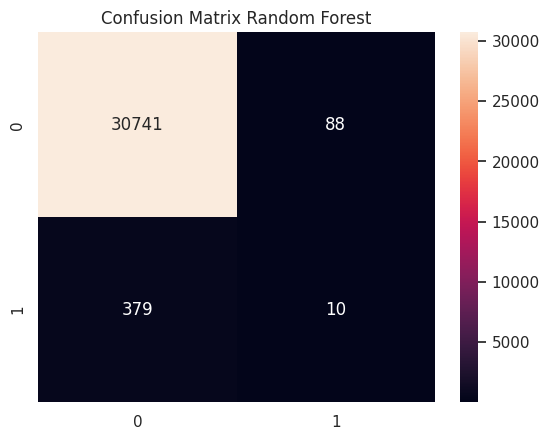

In [70]:
# Pola 
# | TP  | FP |
# | FN  | TN |
con_mat = confusion_matrix(y_test, y_pred_val)
sns.heatmap(con_mat, annot=True, fmt=".5g").set(title="Confusion Matrix Random Forest");

#### Kita akan menggunakan algoritma XGBoost karena jumlah data setiap kelasnya tidak seimbang dan cukup banyak data minoritasnya dan melakukan perbandingan dengan teknik over sampling

In [71]:
label = y.to_frame()
positif_class = label[label["fraud_bool"] == 1].size
negative_class = label[label["fraud_bool"] == 0].size
scale = negative_class / positif_class
scale

81.23709167544784

In [72]:
label = y.to_frame()
positif_class = label[label["fraud_bool"] == 1].size
negative_class = label[label["fraud_bool"] == 0].size
scale = negative_class / positif_class
model = XGBClassifier(scale_pos_weight=scale)
print(f"Rasio = {scale}")
model.fit(X_train, y_train)

Rasio = 81.23709167544784


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [73]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.82      0.90     30829
           1       0.03      0.49      0.06       389

    accuracy                           0.82     31218
   macro avg       0.51      0.66      0.48     31218
weighted avg       0.98      0.82      0.89     31218



ROC AUC: 0.70


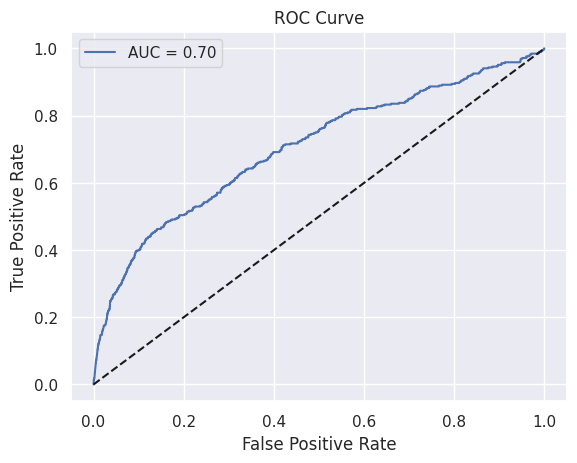

In [74]:
y_proba = model.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC: {auc:.2f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

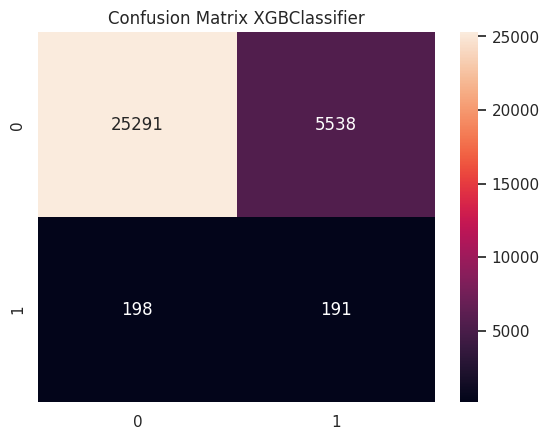

In [75]:
# Pola 
# | TP  | FP |
# | FN  | TN |
con_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(con_mat, annot=True, fmt=".5g").set(title="Confusion Matrix XGBClassifier");

In [76]:
X_resampled, y_resampled = SMOTE().fit_resample(X, y)